In [1]:
# pass to ccqe_notebook_tools

In [2]:
pair_types = ['all'   ,'1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
labels     = ['all'   ,'1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
colors     = ['black' ,'green'    ,'red'        ,'Orange' ,'blue'         ]
cmaps      = ['Greys' , 'Greens'  ,'Reds'       ,'Oranges','Blues'        ]

# Selection and Analysis of v-Ar 1mu-1p with enhanced CCQE 
July 9, 2017

In [3]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [4]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/'

# pairs of 2-tracks at close proximity

In [5]:
pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_Topology_MCC8_MC_BNB_extBNB.csv')
pairsFV = sample_in_FV(pairs)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(pairsFV),'pairs in FV'

42407 pairs from MC-BNB + cosmic DATA overlay
25825 pairs in FV


In [6]:
samples=dict()
for pair_type in pair_types:
    samples[pair_type] = pairsFV[pairsFV[pair_type]==True]
    Ntype = len(samples[pair_type])
    if pair_type=='CC 1p 0pi': print_line()
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(pairsFV))+'%'

25825 are all, 100.0%
3243 are 1mu-1p, 12.6%
3206 are other pairs, 12.4%
19376 are cosmic, 75.0%
--------------------------------------------------------------
873 are CC 1p 0pi, 3.4%


# other-pairs (non 1µ-1p) contributions

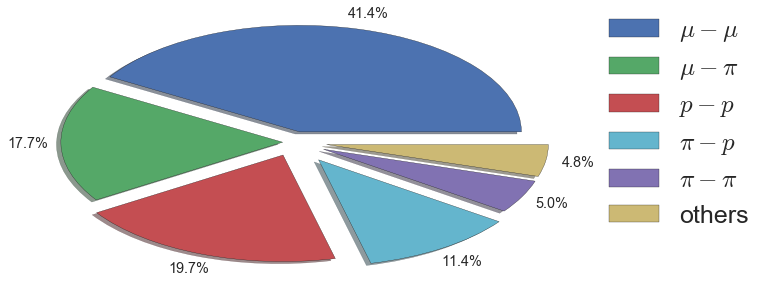

In [8]:
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=figures_size)
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'pieChartOtherPairs.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# µp-events: general features
### To this end, we collect all GENIE interactions with at least 1µ and 1p > 200 MeV/c and break them according to the reconstructed features of the event

In [22]:
mupGENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIEmup_MCC8_MC_BNB_extBNB.csv')
print len(mupGENIEall),'total mu-p pairs in GENIE'
mupGENIE_FV = sample_in_FV(mupGENIEall)
print len(mupGENIE_FV),'total mu-p pairs in GENIE in FV'

50751 total mu-p pairs in GENIE
11257 total mu-p pairs in GENIE in FV


In [20]:
mupGENIEtypes = ['IsCC_1p_200MeVc'        ,'IsVertexContained','IsMuonReconstructed' ,'IsProtonReconstructed','IsVertexReconstructed' ]
mupGENIElabels= ['1$\\mu$, at least 1$p>200$ MeV/c', 'vertex contained','$\\mu$ reconstructed','$p$ reconstructed'    ,'$\\mu,p$ reconstructed']
mupGENIEcolors= ['blue'                   , 'red'             , 'green'              , 'black'               , 'purple']
mupGENIEsamples=[]

In [23]:
mupGENIE=dict()
for pair_type in mupGENIEtypes:
    mupGENIE[pair_type] = mupGENIEall[mupGENIEall[pair_type]==True]
    mupGENIEsamples.append(mupGENIE[pair_type])
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(mupGENIEall))+'%'
# events in which the muon was detected and the proton was undetected
mupGENIE['pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                           &(mupGENIEall['IsProtonReconstructed']==False)]  
print len(mupGENIE['pUnreconstructed']),'are pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['pUnreconstructed']))/len(mupGENIEall))+'%'
mupGENIE['muReconstructed_pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                                           &(mupGENIEall['IsMuonReconstructed']==True)
                                                           &(mupGENIEall['IsProtonReconstructed']==False)]    
print len(mupGENIE['muReconstructed_pUnreconstructed']),'are muReconstructed_pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['muReconstructed_pUnreconstructed']))/len(mupGENIEall))+'%'

50751 are IsCC_1p_200MeVc, 100.0%
24867 are IsVertexContained, 49.0%
18070 are IsMuonReconstructed, 35.6%
9139 are IsProtonReconstructed, 18.0%
7563 are IsVertexReconstructed, 14.9%
15728 are pUnreconstructed, 31.0%
10507 are muReconstructed_pUnreconstructed, 20.7%


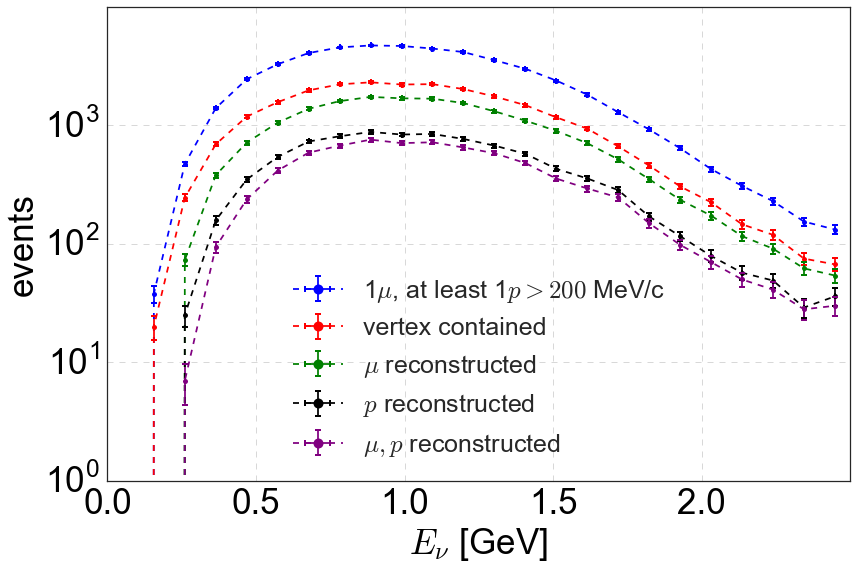

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

# what is the best identification method for The µ and the p?

In [27]:
mup = samples['1mu-1p']
Ntot = len(mup)
mu_long = mup[mup['l_long']==mup['l_muon']]
N_mu_long = len(mu_long)
frac_mu_long = float(N_mu_long)/Ntot
print 'µ is long in %.2f'%(100*frac_mu_long),'%'

p_long = mup[mup['l_long']==mup['l_proton']]
N_p_long = len(p_long)
frac_p_long = float(N_p_long)/Ntot
print 'p is long in %.2f'%(100*frac_p_long),'%'


mu_small_PIDa = mup[mup['l_small_pida']==mup['l_muon']]
N_mu_small_PIDa = len(mu_small_PIDa)
frac_mu_small_PIDa = float(N_mu_small_PIDa)/Ntot
print 'µ with small PIDa in %.2f'%(100*frac_mu_small_PIDa),'%'


small_PIDa_long = mup[mup['l_small_pida']==mup['l_long']]
N_small_PIDa_long = len(small_PIDa_long)
frac_small_PIDa_long = float(N_small_PIDa_long)/Ntot
print 'small PIDa = long in %.2f'%(100*frac_small_PIDa_long),'%'

mu_small_PIDa_long = mup[(mup['l_small_pida']==mup['l_muon'])
                         & (mup['l_long']==mup['l_muon'])]
N_mu_small_PIDa_long = len(mu_small_PIDa_long)
frac_mu_small_PIDa_long = float(N_mu_small_PIDa_long)/Ntot
print 'µ with small PIDa and long in %.2f'%(100*frac_mu_small_PIDa_long),'%'

µ is long in 88.81 %
p is long in 11.19 %
µ with small PIDa in 86.62 %
small PIDa = long in 78.32 %
µ with small PIDa and long in 76.87 %


# what is the distance between the µ and the p?

93.7183503773 %


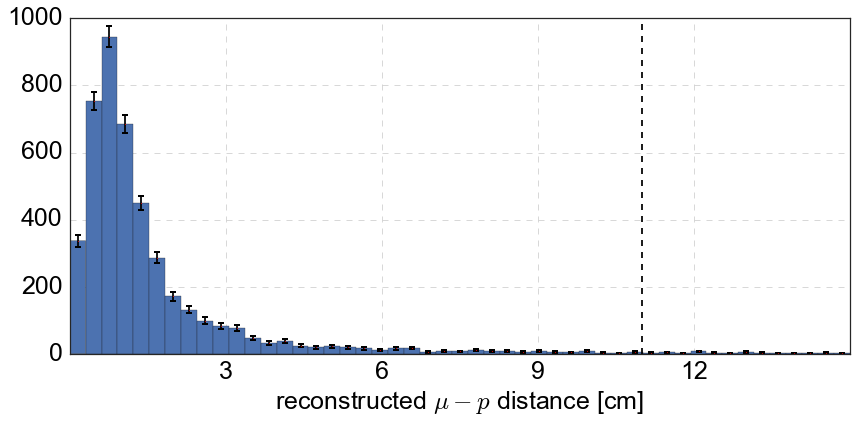

In [440]:
x = mupGENIE['IsCC_1p_200MeVc']['distance']
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,15,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , '', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
# ax.set_yscale('log')
plt.savefig(figures_path+'mup_distance.pdf')
# how many of the µp pairs are retained for a cut < 11 cm?
print 100.*float(len(mupGENIE['IsCC_1p_200MeVc'][mupGENIE['IsCC_1p_200MeVc']['distance']<11]))/len(mupGENIE['IsCC_1p_200MeVc']),'%'

In [121]:
## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [16]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))
    for gtype,label,color in zip(['IsProtonReconstructed','pUnreconstructed']
                             ,['proton reconstructed','proton not-reconstructed']
                             ,['royalblue','salmon']):
        x = mul*mupGENIE[gtype][var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1])
        ax.errorbar( mid, h.astype(float)/len(x), yerr=1./np.sqrt(h)/len(x), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
    
    set_axes(ax,xlabel , '', fontsize=25,xticks=xticks)
    ax.legend(loc='upper right',fontsize=25,markerscale=2.)
    ax.grid(linestyle='--',alpha=0.5)
    plt.tight_layout()
    plt.savefig(figures_path+'ProtonRecoUnreco_'+var+'.pdf')

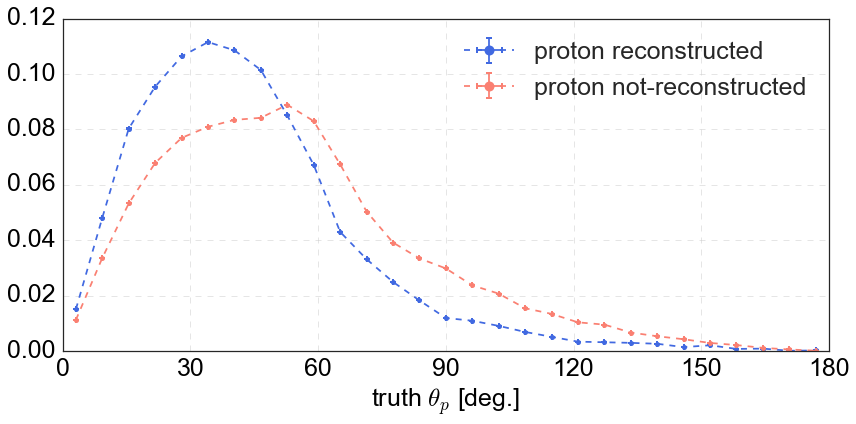

In [17]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=180./np.pi,bins=np.linspace(0,180,30),xticks=np.linspace(0,180,7))

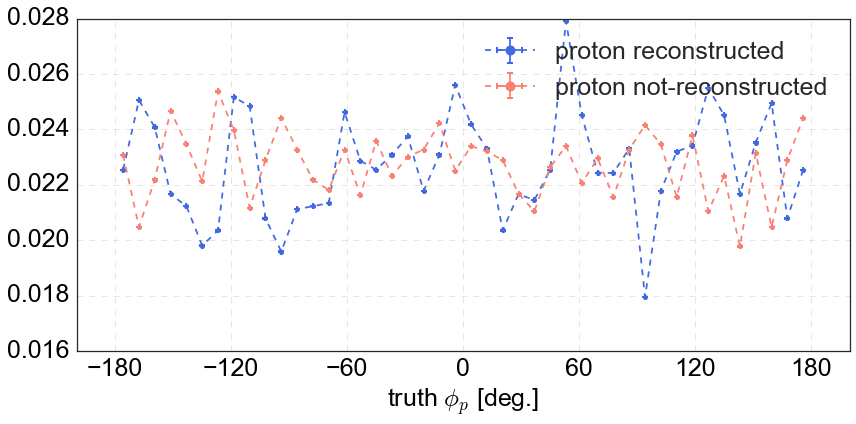

In [18]:
plot_proton_reco_unreco(var='truth_Pp_phi',xlabel='truth $\\phi_{p}$ [deg.]',mul=180./np.pi,bins=np.linspace(-180,180,45),xticks=np.linspace(-180,180,7))

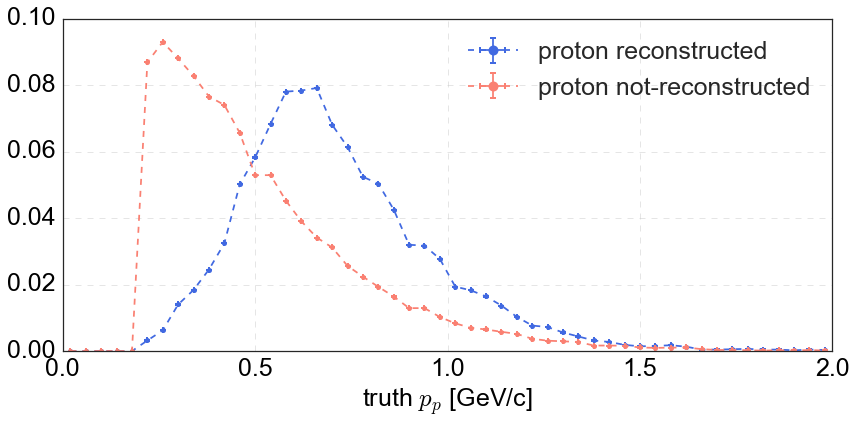

In [19]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,51),xticks=np.linspace(0,2,5))

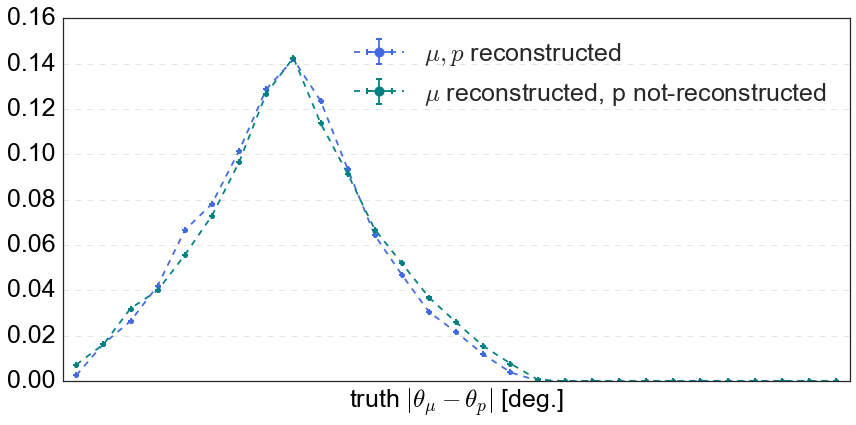

In [476]:
fig,ax=plt.subplots(figsize=(12,6))
bins=np.linspace(0,300,30)
for gtype,label,color in zip(['IsVertexReconstructed','muReconstructed_pUnreconstructed']
                             ,['$\mu,p$ reconstructed','$\mu$ reconstructed, p not-reconstructed']
                             ,['royalblue','teal']):
    x = mupGENIE[gtype]['truth_Pp']
#     x = (180./np.pi)*np.abs(mupGENIE[gtype]['truth_Pmu_phi'] - mupGENIE[gtype]['truth_Pp_phi'])
#     x = (180./np.pi)*np.abs(mupGENIE[gtype]['truth_Pmu_theta'] - mupGENIE[gtype]['truth_Pp_theta'])
    x = (180./np.pi)*np.arccos((mupGENIE[gtype]['truth_Pp_x']*mupGENIE[gtype]['truth_Pmu_x']
                             +mupGENIE[gtype]['truth_Pp_y']*mupGENIE[gtype]['truth_Pmu_y']                            
                             +mupGENIE[gtype]['truth_Pp_z']*mupGENIE[gtype]['truth_Pmu_z'])
                             /(mupGENIE[gtype]['truth_Pp']*mupGENIE[gtype]['truth_Pmu']))

    h , edges = np.histogram(x,bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h.astype(float)/len(x), yerr=1./np.sqrt(h)/len(x), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)    
set_axes(ax,'truth $|\\theta_{\\mu}-\\theta_{p}|$ [deg.]' , '', fontsize=25,xticks=[])
ax.legend(loc='upper right',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.5)
plt.tight_layout()
plt.savefig(figures_path+'MuonReconstructed_ProtonUnreconstructed_DeltaTheta.pdf')

# cuts

In [8]:
def get_pur_eff_cut(cut_name = '${PID}_A$' , reduced = dict()):
    global pur_eff
    Noriginal , Nreducted , freducted = dict() , dict() , dict()
    for pair_type in pair_types:
        sam = samples[pair_type]
        Noriginal[pair_type] = len(samples[pair_type])
        Nreducted[pair_type] = float(len(reduced[pair_type]))
        freducted[pair_type] = 100.0 * Nreducted[pair_type]/Noriginal[pair_type]
    pur_eff_cut = pd.DataFrame({'$\mu p$ eff.':'%.1f'%freducted['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%(100.*Nreducted['1mu-1p']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freducted['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreducted['CC 1p 0pi']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pur_eff_cut[pair_type] = '%.1f'%freducted[pair_type]+'%' +' (%.0f)'%Nreducted[pair_type]
    pur_eff = pur_eff.append(pur_eff_cut)
    reduced_samples[cut_name] = reduced    

In [9]:
reduced_samples=dict(dict())
pur_eff = pd.DataFrame()
reduced = dict()
for pair_type in pair_types: reduced[pair_type] = samples[pair_type]
reduced_samples['no cut'] = reduced
# before cuts
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam
get_pur_eff_cut(cut_name = 'no cut', reduced = reduced)


# cut 1: PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam[sam['PIDA_assigned_proton']>8]
get_pur_eff_cut(cut_name = '${PID}_A$', reduced = reduced)

# cut 2: lµ vs lp
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['${PID}_A$'][pair_type]
    reduced[pair_type] = sam[(sam['l_small_pida']>4)
                             &(sam['l_large_pida']>8)&(sam['l_large_pida']<120)]
get_pur_eff_cut(cut_name = '$l_{\\mu}-l_{p}$', reduced = reduced)

# cut 3: |\theta_{1,2}-90^0|<60^0$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$l_{\\mu}-l_{p}$'][pair_type]
    reduced[pair_type] = sam[np.abs(180./np.pi*sam['2_tracks_angle']-90)<60]
get_pur_eff_cut(cut_name = '$|\theta_{1,2}-90^0|<60^0$', reduced = reduced)

# cut 4: vertex $\Delta Q$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    reduced[pair_type] = sam[sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.*sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.5]
get_pur_eff_cut(cut_name = 'vertex $\Delta Q$', reduced = reduced)

# cut 5: $\Delta phi$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['vertex $\Delta Q$'][pair_type]
    reduced[pair_type] = sam[np.abs(sam['delta_phi']-180.000)<30]
get_pur_eff_cut(cut_name = '$|\Delta \phi - \pi|<\pi/6$', reduced = reduced)

# cut 6: $\theta_{pq}<25$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_theta_pq_fromE']<25]
get_pur_eff_cut(cut_name = '$\theta_{pq}<25$', reduced = reduced)


# modified cut 6: $p_{t}<0.35$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.35]
get_pur_eff_cut(cut_name = '$p_{t}<0.35$', reduced = reduced)


# tight Pt cut for good Ev reconstruction
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.15]
get_pur_eff_cut(cut_name = '$p_{t}<0.15$', reduced = reduced)

pur_eff

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,all,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,3.4%,100.0% (25825),100.0% (3243),100.0% (3206),100.0% (19376),100.0% (873)
${PID}_A$,94.2%,31.7%,94.2%,8.5%,37.3% (9628),94.2% (3055),60.7% (1945),23.9% (4628),94.2% (822)
$l_{\mu}-l_{p}$,73.3%,35.7%,76.3%,10.0%,25.8% (6660),73.3% (2377),44.3% (1421),14.8% (2862),76.3% (666)
"$|\theta_{1,2}-90^0|<60^0$",67.7%,61.5%,73.4%,18.0%,13.8% (3567),67.7% (2194),26.3% (844),2.7% (529),73.4% (641)
vertex $\Delta Q$,43.2%,69.5%,65.2%,28.2%,7.8% (2015),43.2% (1401),12.8% (411),1.0% (203),65.2% (569)
$|\Delta \phi - \pi|<\pi/6$,27.9%,89.4%,56.2%,48.5%,3.9% (1013),27.9% (906),3.1% (99),0.0% (8),56.2% (491)
$\theta_{pq}<25$,21.6%,94.1%,46.7%,54.8%,2.9% (744),21.6% (700),1.3% (43),0.0% (1),46.7% (408)
$p_{t}<0.35$,22.3%,93.3%,47.5%,53.5%,3.0% (775),22.3% (723),1.6% (51),0.0% (1),47.5% (415)
$p_{t}<0.15$,11.9%,95.3%,27.1%,58.5%,1.6% (405),11.9% (386),0.6% (19),0.0% (0),27.1% (237)


# Enhance contribtion from true CC1p0π pairs

## detection cuts

### PIDa 

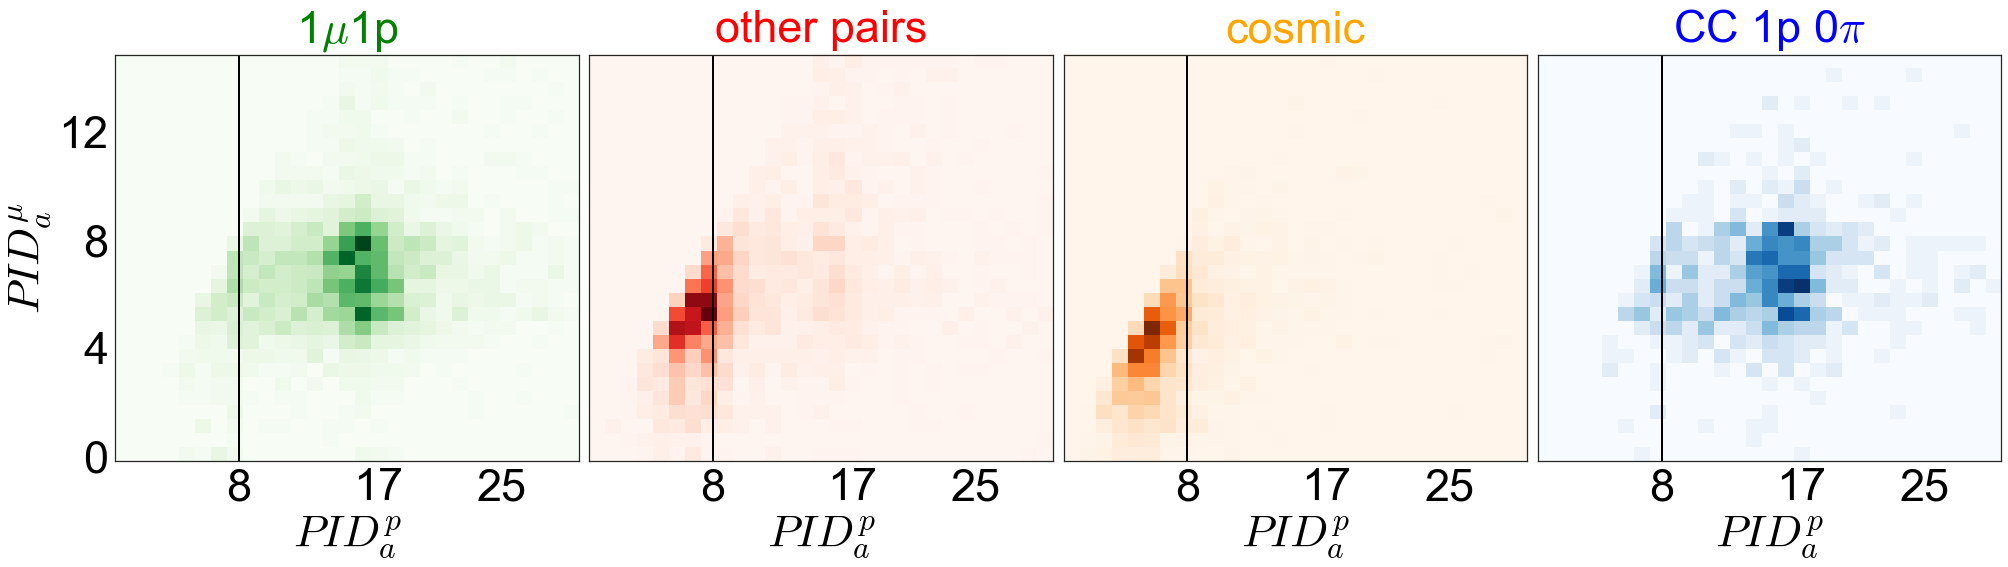

In [298]:
#traingle
# lines_graphical_cut = do_graphical_cut(xy_pts = [[11.,0.],[7.,8.],[0.,0.], [11.,0.]],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')
PIDaCut = 8
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,30),np.linspace(0,15,30))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['PIDA_assigned_proton'], sample['PIDA_assigned_muon'], ax=ax,fontsize=figures_fontsize,ticks_color='white',bins=bins,cmap=cmap,norm='')            
    plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45,xticks=[8,17,25],yticks=[0,4,8,12])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa_mu_p.pdf')

##### length

2491 in sample 0 , 77  %
2169 in sample 1 , 68  %
11963 in sample 2 , 62  %
701 in sample 3 , 80  %


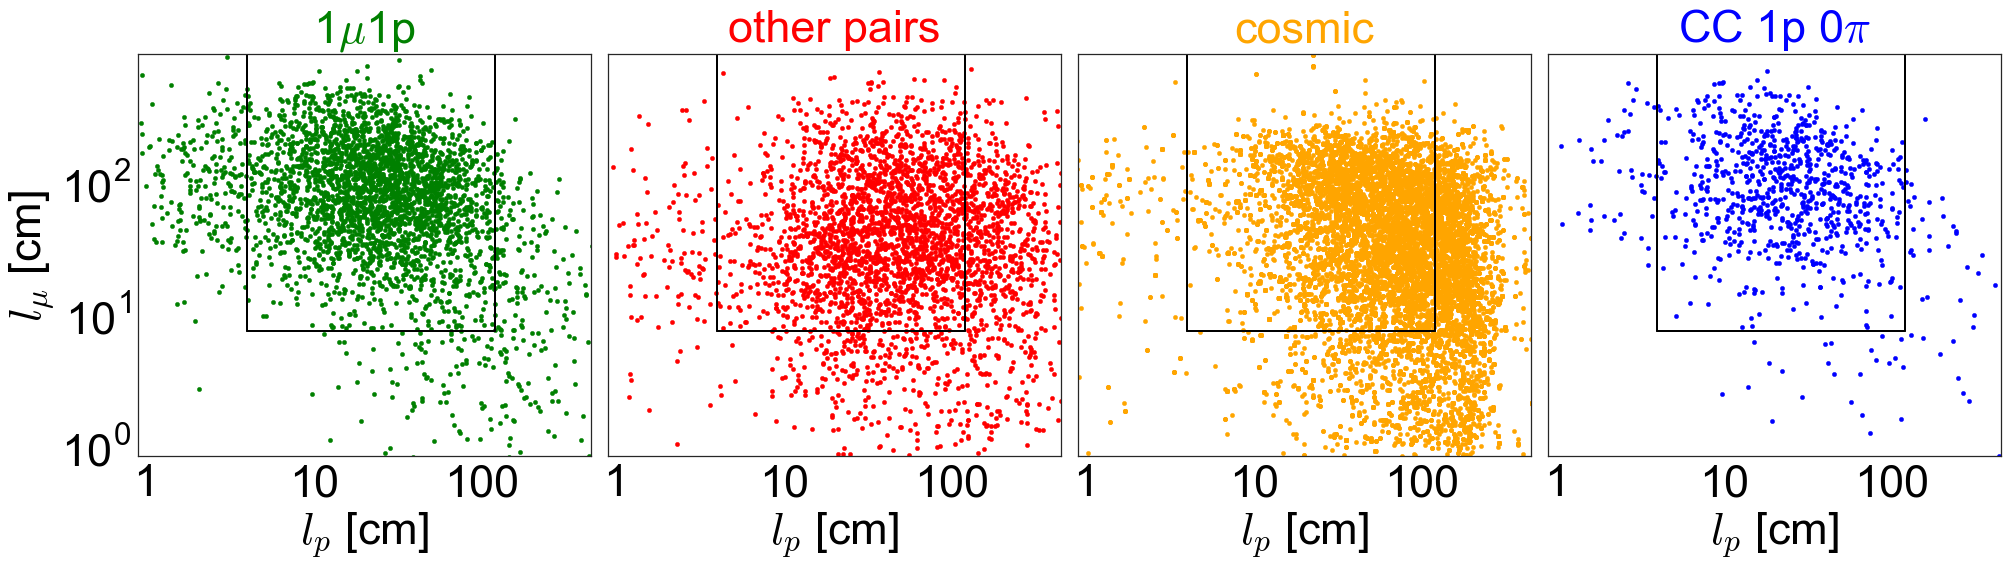

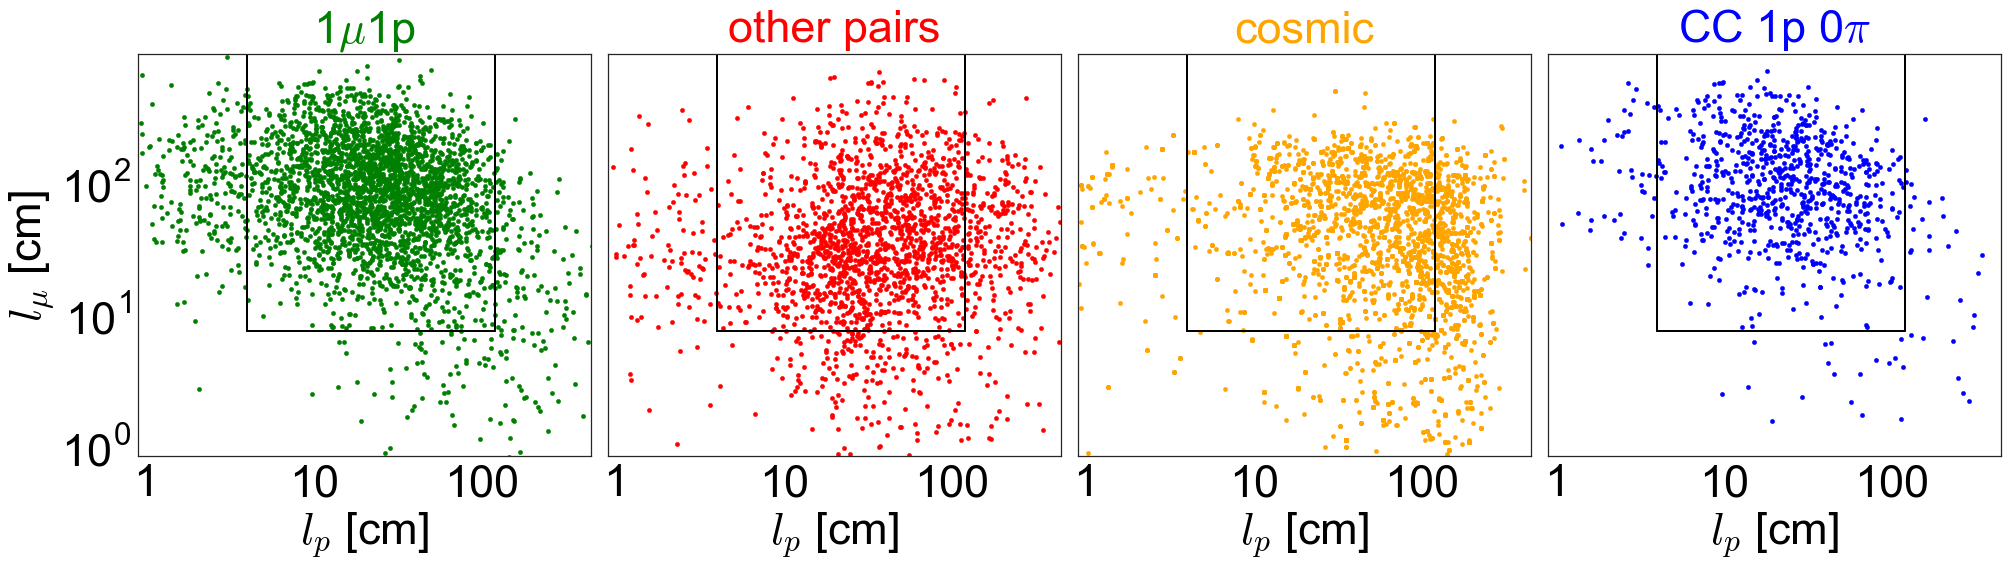

In [10]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'-',color='black',linewidth=2)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p.pdf')

# after cut-1
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['${PID}_A$'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'-',color='black',linewidth=2)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_1.pdf')

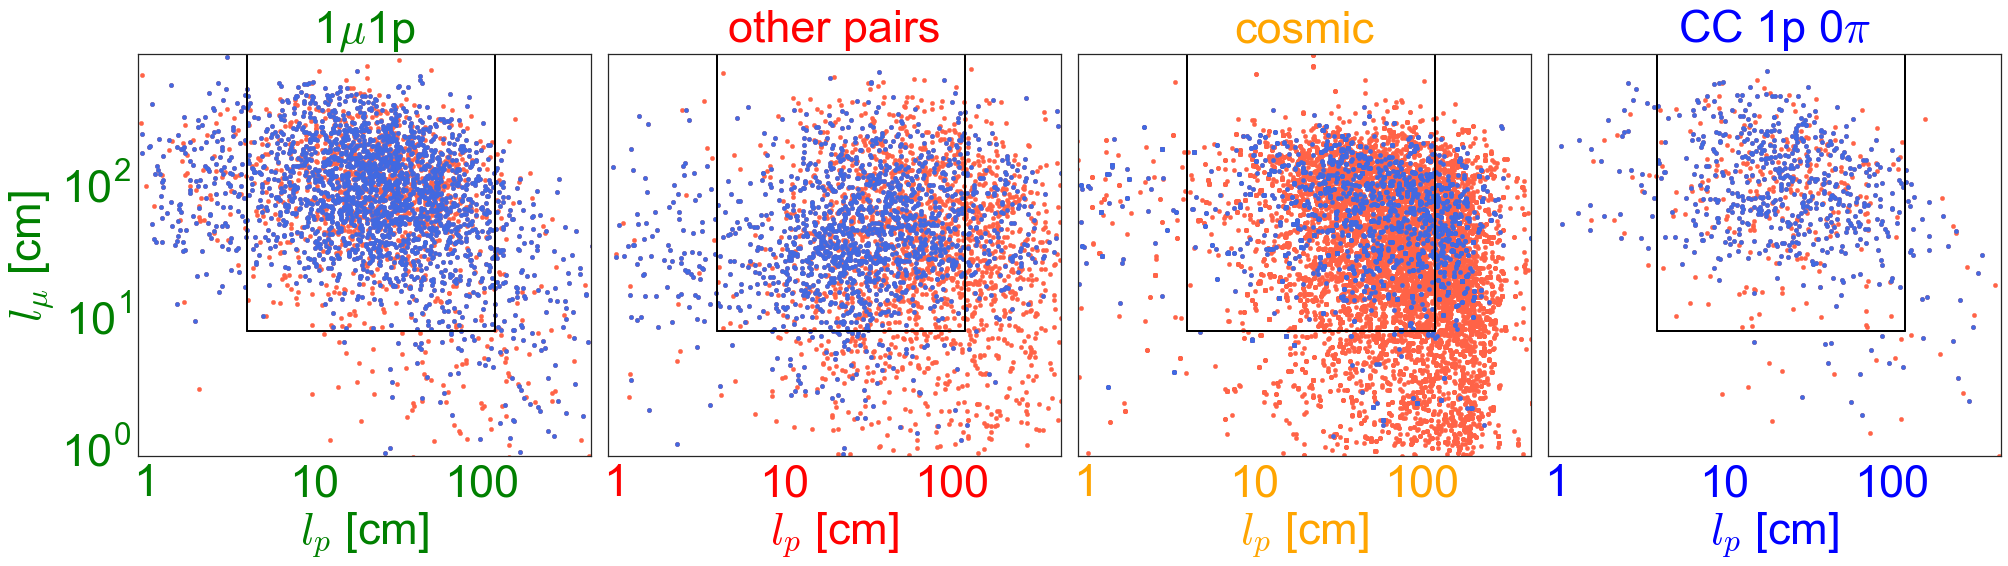

In [305]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,scatter_color in zip(['no cut','${PID}_A$'] ,['tomato','royalblue']):
        sample = reduced_samples[cut_name][pair_type]
        ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=scatter_color)
        
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=2)
    plt.plot([4,120],[8,8],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color=color,fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_before_after_cut_1.pdf')

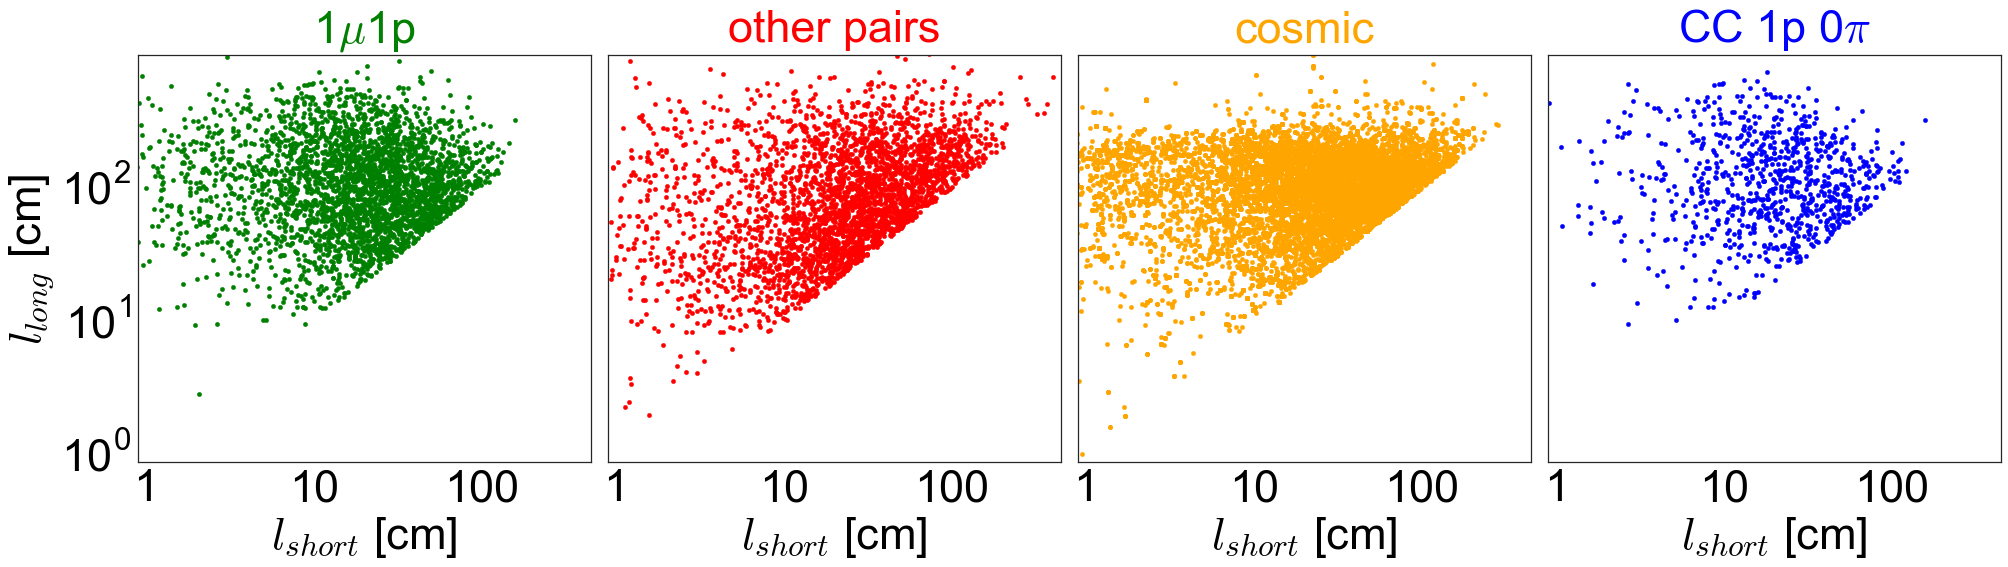

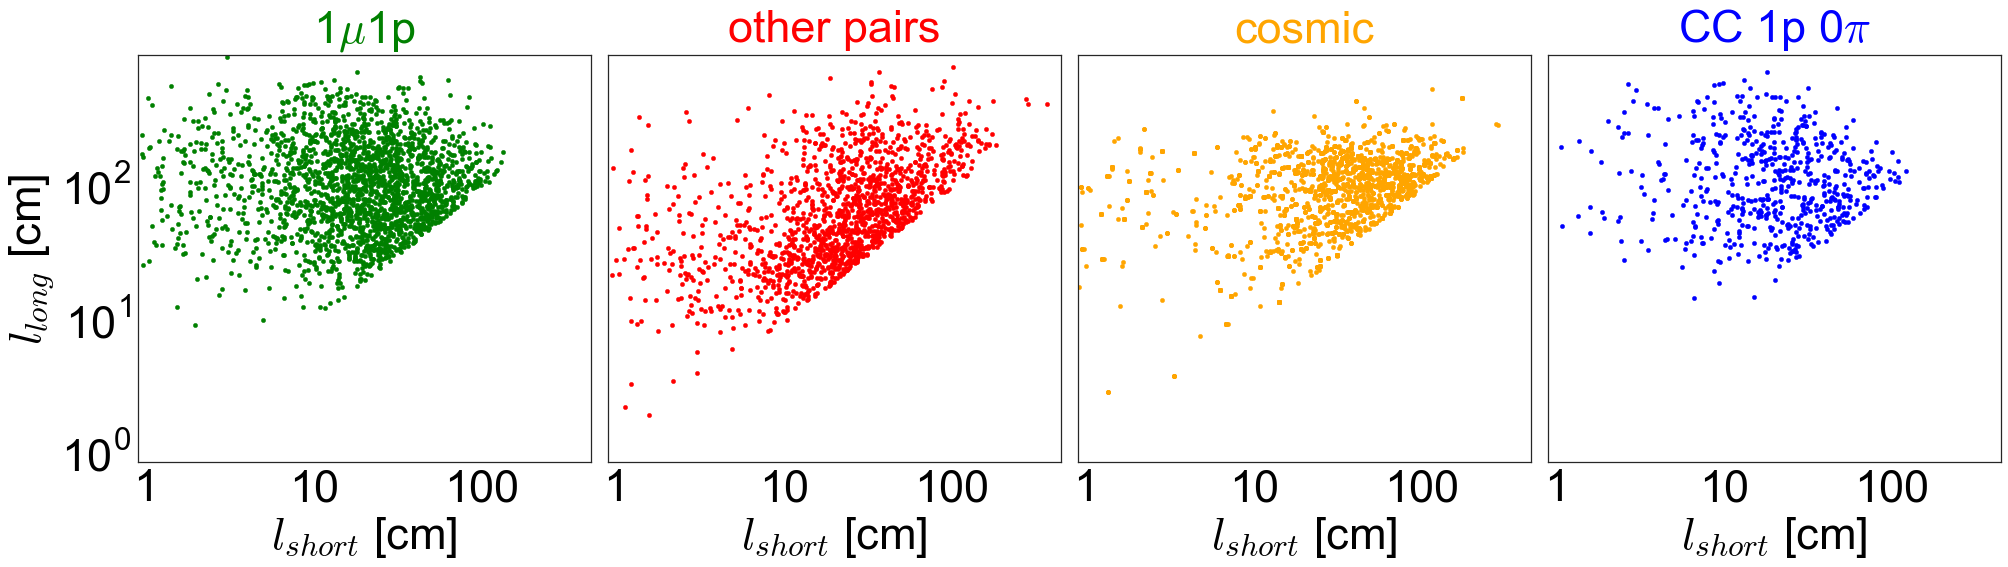

In [306]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{short}$ [cm]','$l_{long}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_short'], sample['l_long'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_long_short.pdf')

reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{short}$ [cm]','$l_{long}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['${PID}_A$'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_short'], sample['l_long'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_long_short_after_cut_1.pdf')

In [44]:
#---------------------------------------------------------------------------------------------
# July-11, 2017
def plot_feature_pairs(cut_name='${PID}_A$',
                       var='l_long',x_label='$l_{long}$ [cm]',mul=1,                                
                       bins=np.linspace(0,300,50),
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center', 
                       ticks_color='black'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
        sample = reduced_samples[cut_name][pair_type]
        if len(sample) < 10: continue
        h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        text_colors.append(color)
        p = plt.plot([0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h:
            max_h=np.max(h)
        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,fontsize=fontsize,ticks_color=ticks_color,do_add_grid=True)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------
# July-11, 2017
def plot_cut_samples (reduced_cut_name='${PID}_A$',
                      cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=figures_size,fontsize=25,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='bbox',legend_fontsize=25,
                      ticks_color='black'):
    fig,ax=plt.subplots(figsize=figsize)
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
        sample = reduced_samples[reduced_cut_name][pair_type]
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , xerr=0, fmt='o' , markersize=markers_size , label=label, color=color)
    if do_add_legend: 
        if 'bbox' not in legend_loc:
            leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc,markerscale=2.)
        else:
            leg=ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize=legend_fontsize,markerscale=2.)
        for color,text in zip(colors[1:],leg.get_texts()):
            text.set_color(color)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color,xticks=np.linspace(xmin,xmax,7),yticks=[25,50,75,100])
    ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
    return ax,leg
#---------------------------------------------------------------------------------------------

### no collinearity

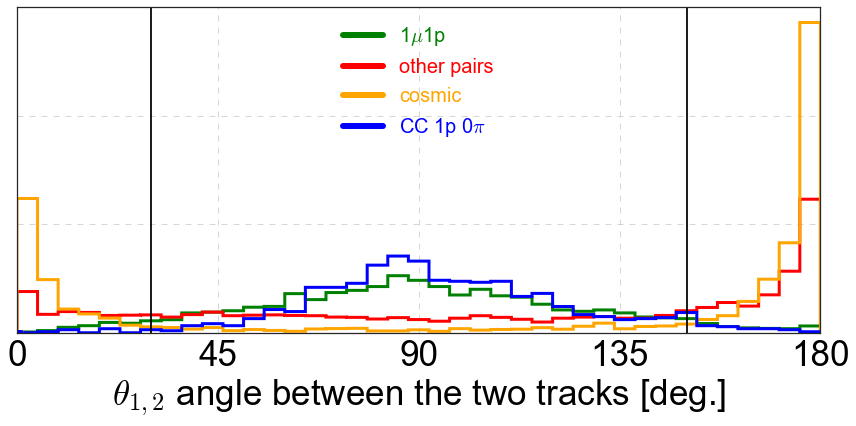

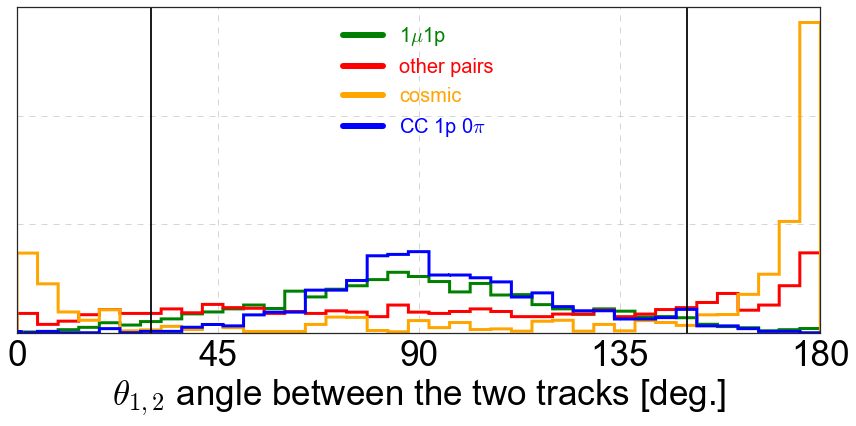

In [35]:
var='2_tracks_angle'
x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
ax=plot_feature_pairs(cut_name='no cut',var=var,x_label=x_label
                              ,mul=180./np.pi,bins=np.linspace(0,180,40),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([30,30],ax.get_ylim(),'-',color='black')
ax.plot([150,150],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'angle_between_tracks.pdf')
# after cut 2
ax=plot_feature_pairs(cut_name='$l_{\\mu}-l_{p}$',var=var,x_label=x_label
                              ,mul=180./np.pi,bins=np.linspace(0,180,40),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([30,30],ax.get_ylim(),'-',color='black')
ax.plot([150,150],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'angle_between_tracks_after_cut_2.pdf')

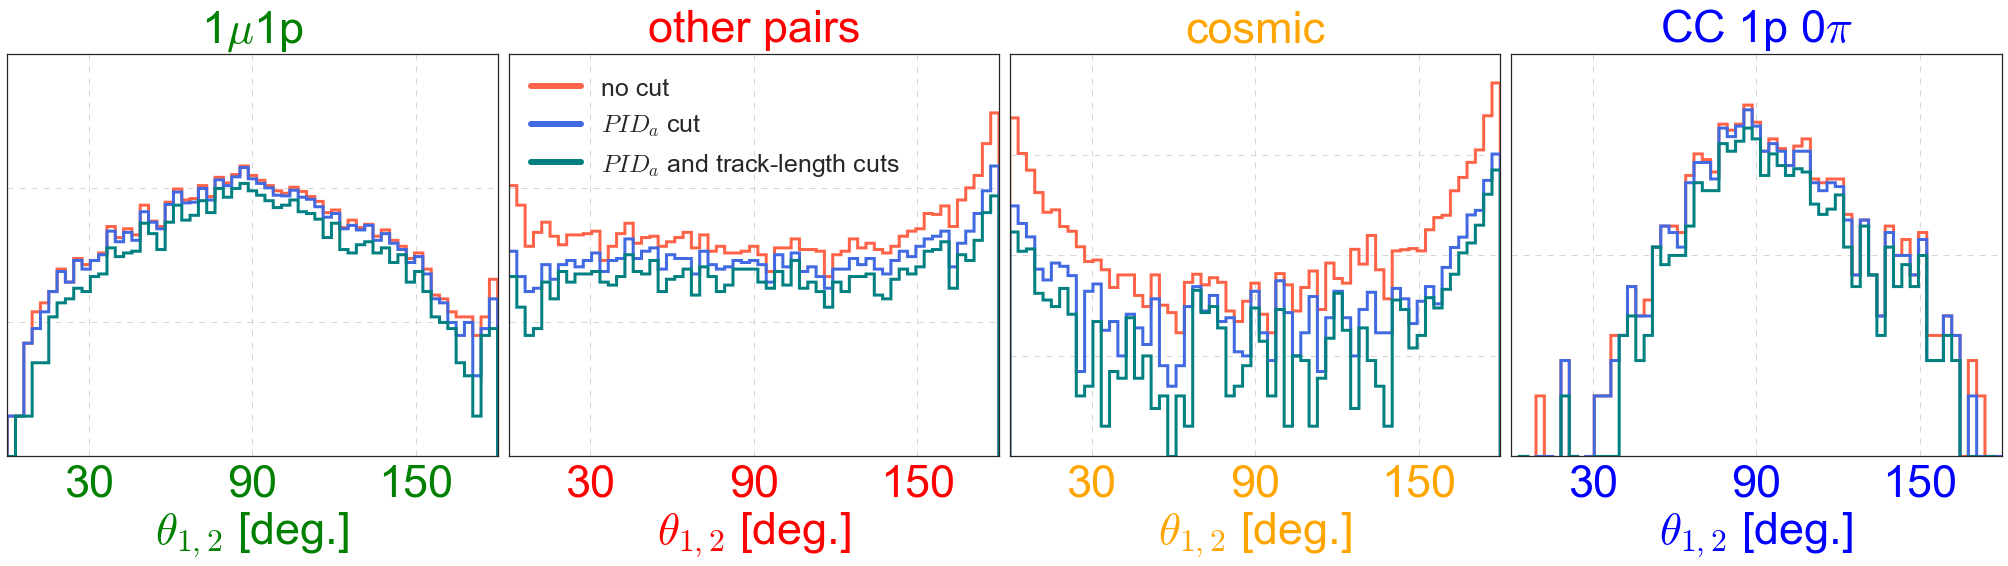

In [36]:
fig = plt.figure(figsize=(28,8))
bins=np.linspace(0,180,60)
x_label='$\\theta_{1,2}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,s_color,s_label in zip(['no cut','${PID}_A$','$l_{\\mu}-l_{p}$'] 
                                        ,['tomato','royalblue','teal']
                                        ,['no cut','$PID_a$ cut','$PID_a$ and track-length cuts']):
        sample = reduced_samples[cut_name][pair_type]
        theta = 180./np.pi*sample['2_tracks_angle']
        plt.hist(theta,bins=bins,color=s_color,histtype='step',linewidth=3) #,normed=1
        p = plt.plot([0,0], label=s_label,linestyle='-',linewidth=6,color=s_color)
    set_axes(ax,x_label=x_label, y_label='',fontsize=45,xticks=[30,90,150],ticks_color=color,do_add_grid=True) 
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    if i==1: ax.legend(fontsize=25,loc='upper left')    
# for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
#     ax = fig.add_subplot(1,4,i+1)    
#     ax.plot([30,30],ax.get_ylim(),'-',color='black')
#     ax.plot([150,150],ax.get_ylim(),'-',color='black')

plt.tight_layout()
fig.savefig(figures_path+'angle_between_tracks_before_after_cut_1_2.pdf')

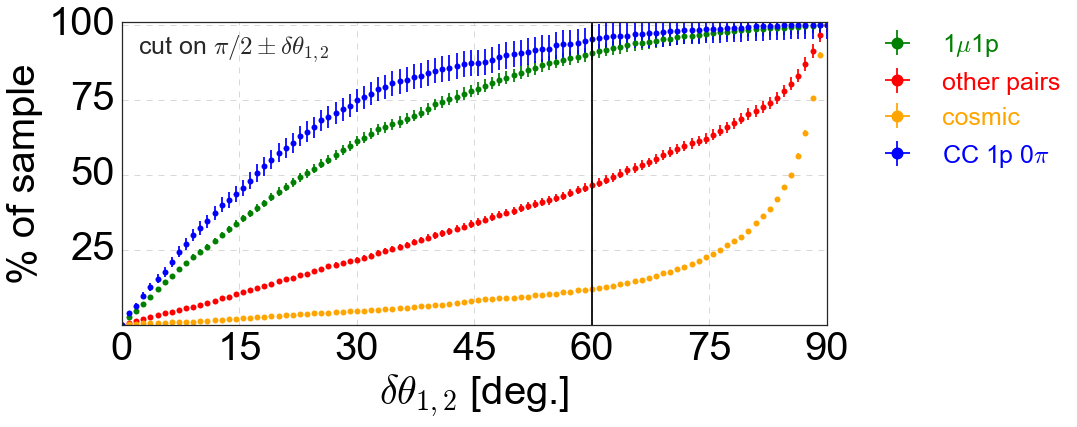

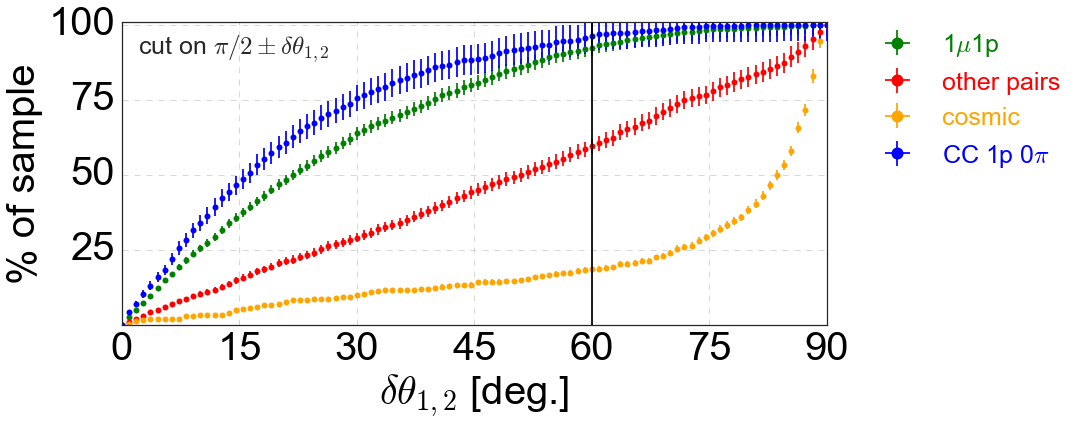

In [47]:
#reduced_samples['cut 3']
ax,leg=plot_cut_samples(reduced_cut_name='no cut',cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=True,
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
ax.text(2,90,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
ax.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'angle_between_tracks_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

# after cut 2
ax,leg=plot_cut_samples(reduced_cut_name='$l_{\\mu}-l_{p}$',cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=True,
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,90,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'angle_between_tracks_cuts_after_cut_2.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
1401 in sample 0 , 64  %
411 in sample 1 , 49  %
203 in sample 2 , 38  %
569 in sample 3 , 89  %


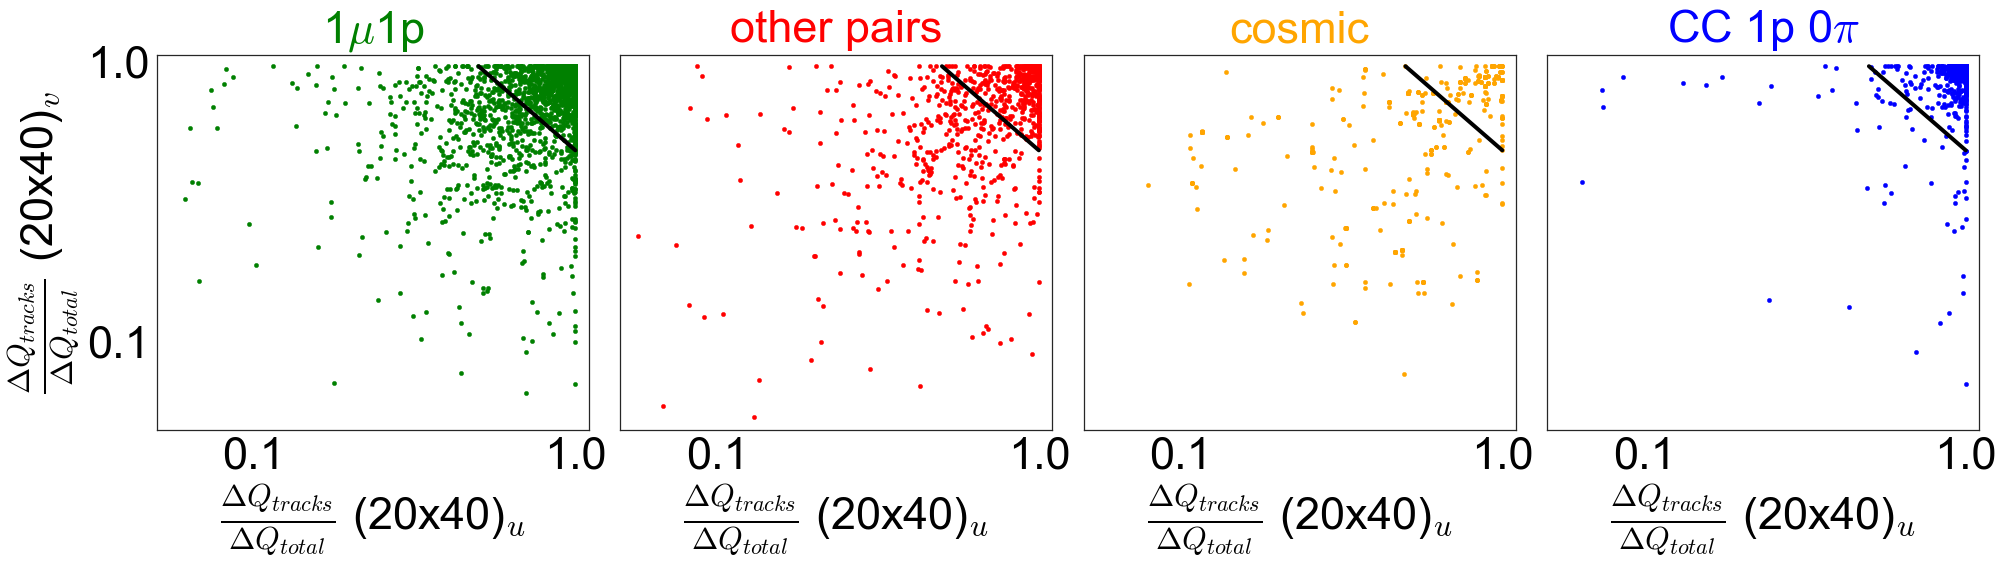

In [38]:
reduced_this_cut,frac=[],[]
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    original_sample = reduced_samples['no cut'][pair_type]
    sample = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample[varx], sample[vary],color=color)
    
    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    
    x_array,y_array=[0.5,1.],[1.,0.5]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'-',color='black',linewidth=4)
    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())  
    else: ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    
    if i==0: print "reduced=reduced[reduced['%s']>%f*reduced['%s']+%f]"%(vary,slope,varx,intercept)
    red = sample
    red=red[red[vary]>slope*red[varx]+intercept]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()
fig.savefig(figures_path+'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_uv.pdf')

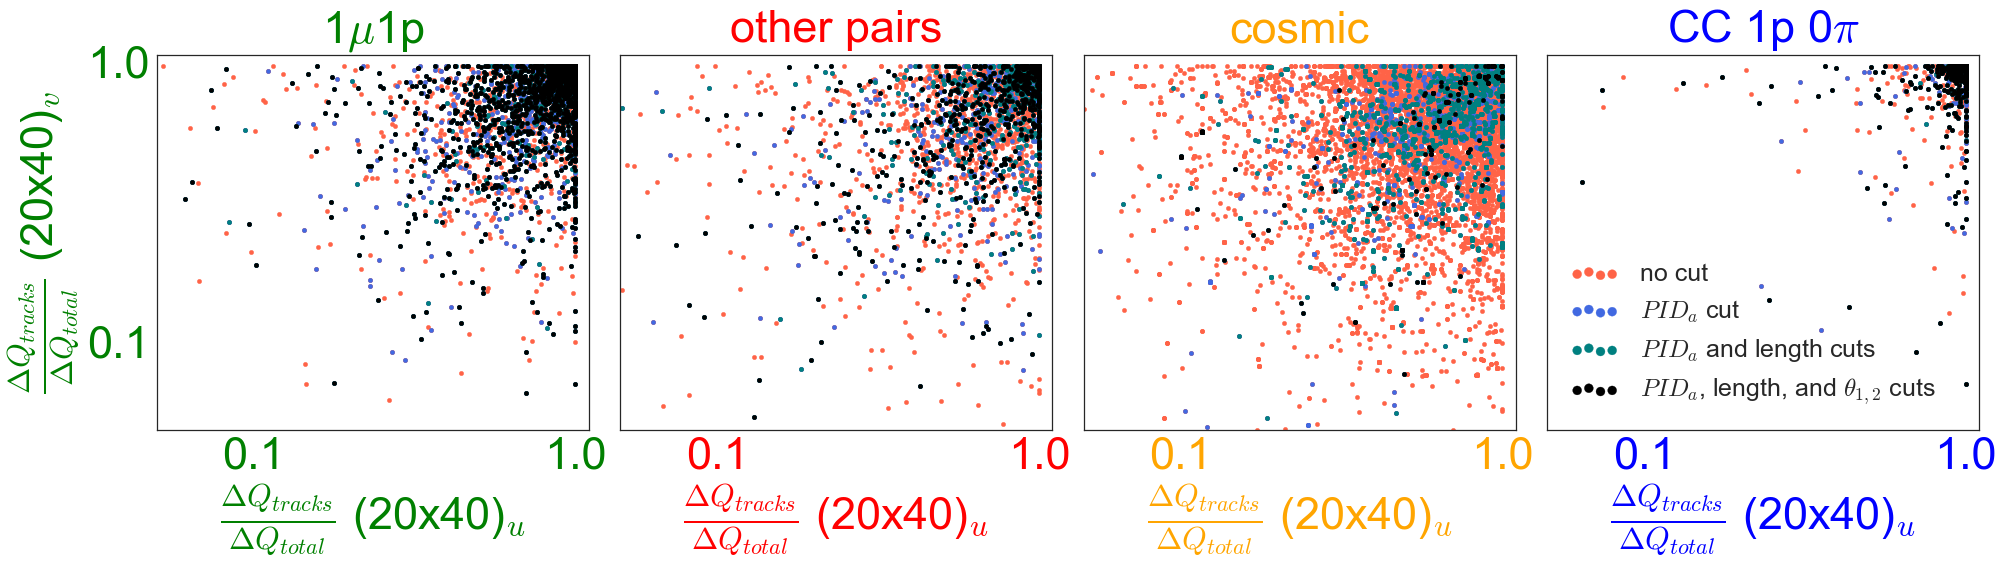

In [387]:
fig = plt.figure(figsize=(28,8))

# for i,label,cmap,color in zip(range(4),labels,cmaps,colors):
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,s_color,s_label in zip(['no cut','${PID}_A$','$l_{\\mu}-l_{p}$','$|\theta_{1,2}-90^0|<60^0$'] 
                                        ,['tomato','royalblue','teal','black']
                                        ,['no cut','$PID_a$ cut','$PID_a$ and length cuts','$PID_a$, length, and $\\theta_{1,2}$ cuts']):
        sample = reduced_samples[cut_name][pair_type]
        ax.scatter(sample[varx], sample[vary],color=s_color,label=s_label)

    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,ticks_color=color)    
#     plt.plot(x_array,y_array,'-',color='black',linewidth=4)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())  
    else: ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

    if i==3: ax.legend(fontsize=25,loc='lower left',scatterpoints=4,markerscale=2)
plt.tight_layout()
fig.savefig(figures_path+'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_uv_before_after_cuts_123.pdf')

## \Delta \phi

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


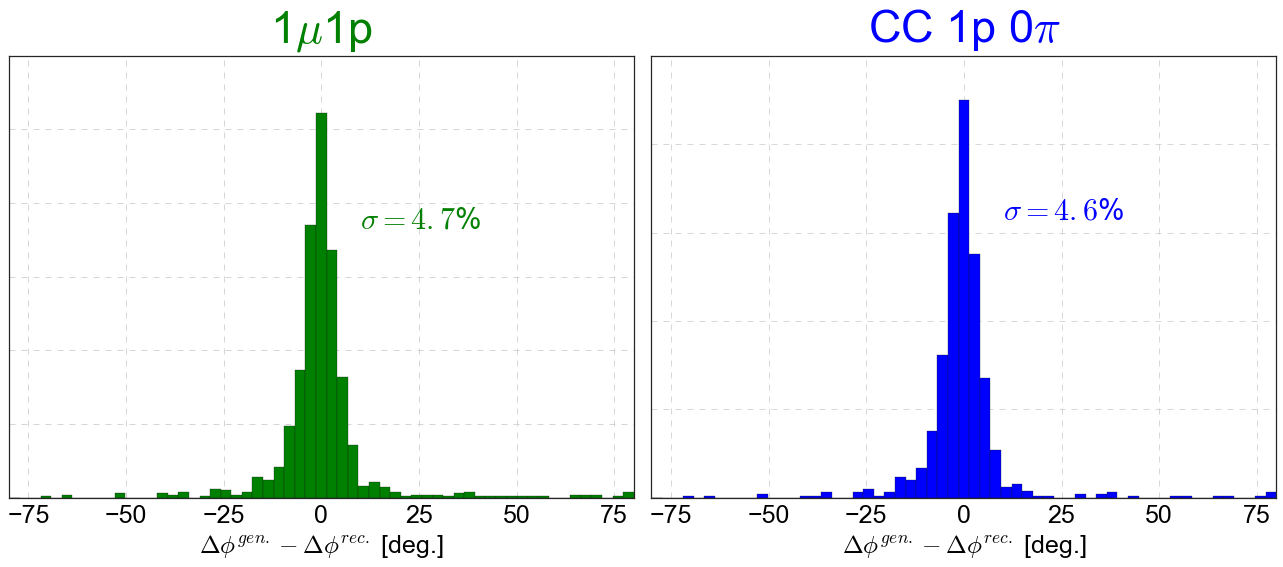

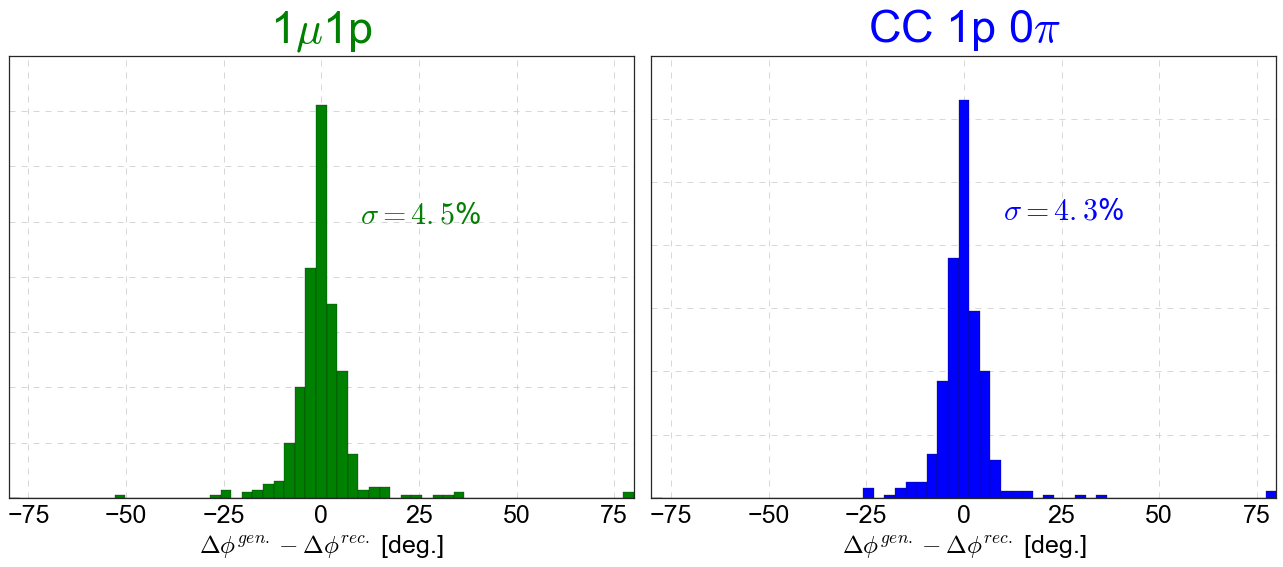

In [393]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['no cut'][pair_type]    
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_Pmu_phi'] - sample['truth_Pp_phi'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['vertex $\Delta Q$'][pair_type]    
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_Pmu_phi'] - sample['truth_Pp_phi'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_cut_4.pdf')

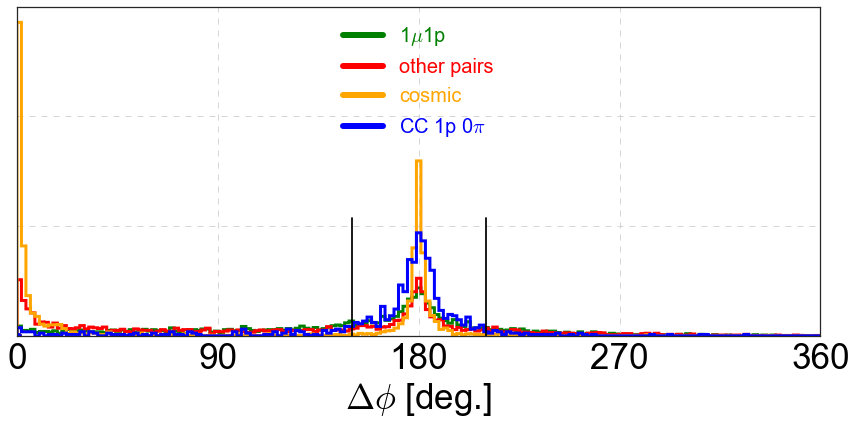

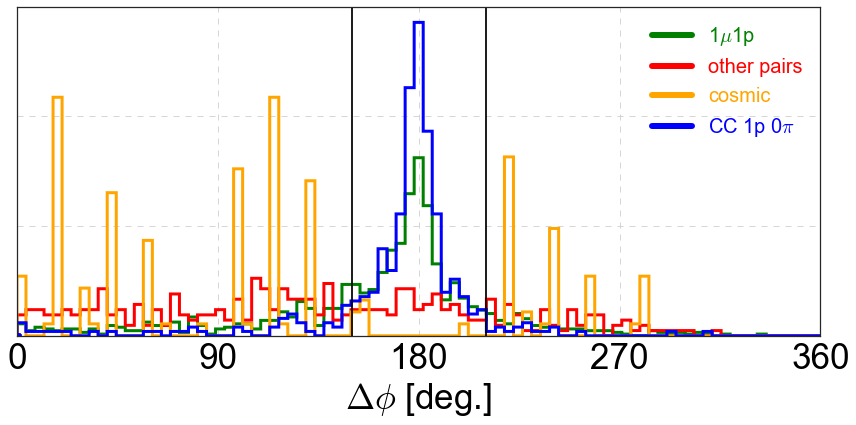

In [398]:
plot_feature_pairs(cut_name='no cut',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'-',color='black')
plt.plot([210,210],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi.pdf')

# after cut 4
plot_feature_pairs(cut_name='vertex $\Delta Q$',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper right'
                              ,bins=np.linspace(0,360,90),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'-',color='black')
plt.plot([210,210],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_after_cut_4.pdf')

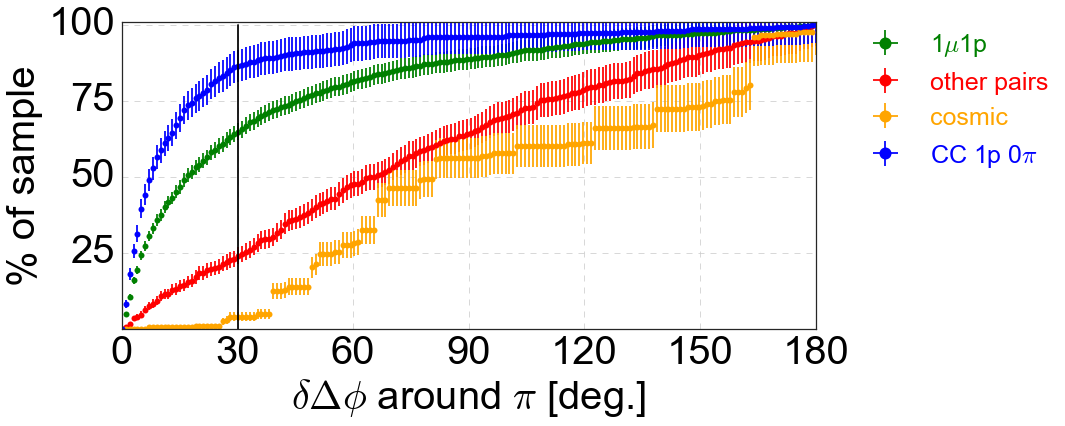

In [48]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex $\Delta Q$',do_add_legend=True,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([30,30],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

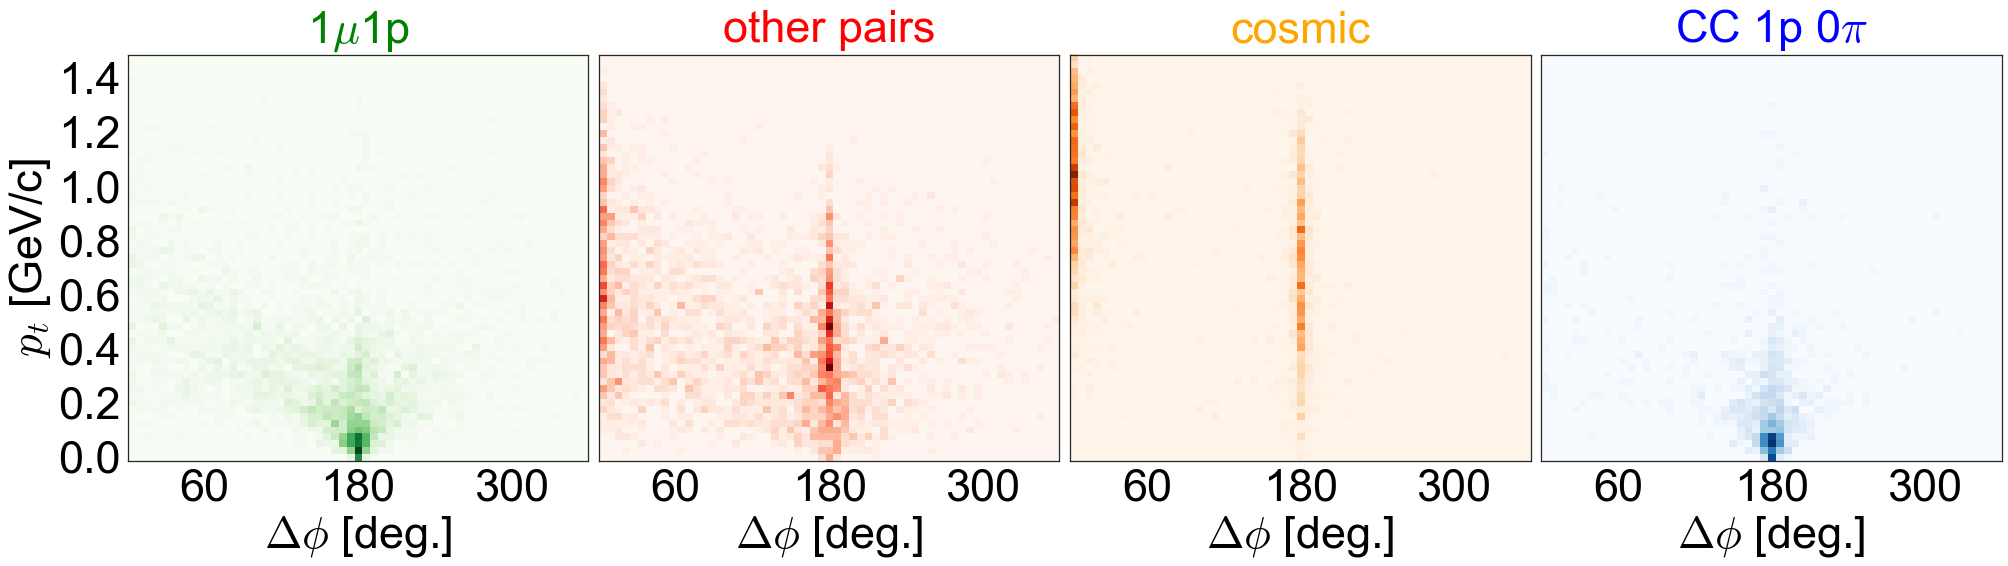

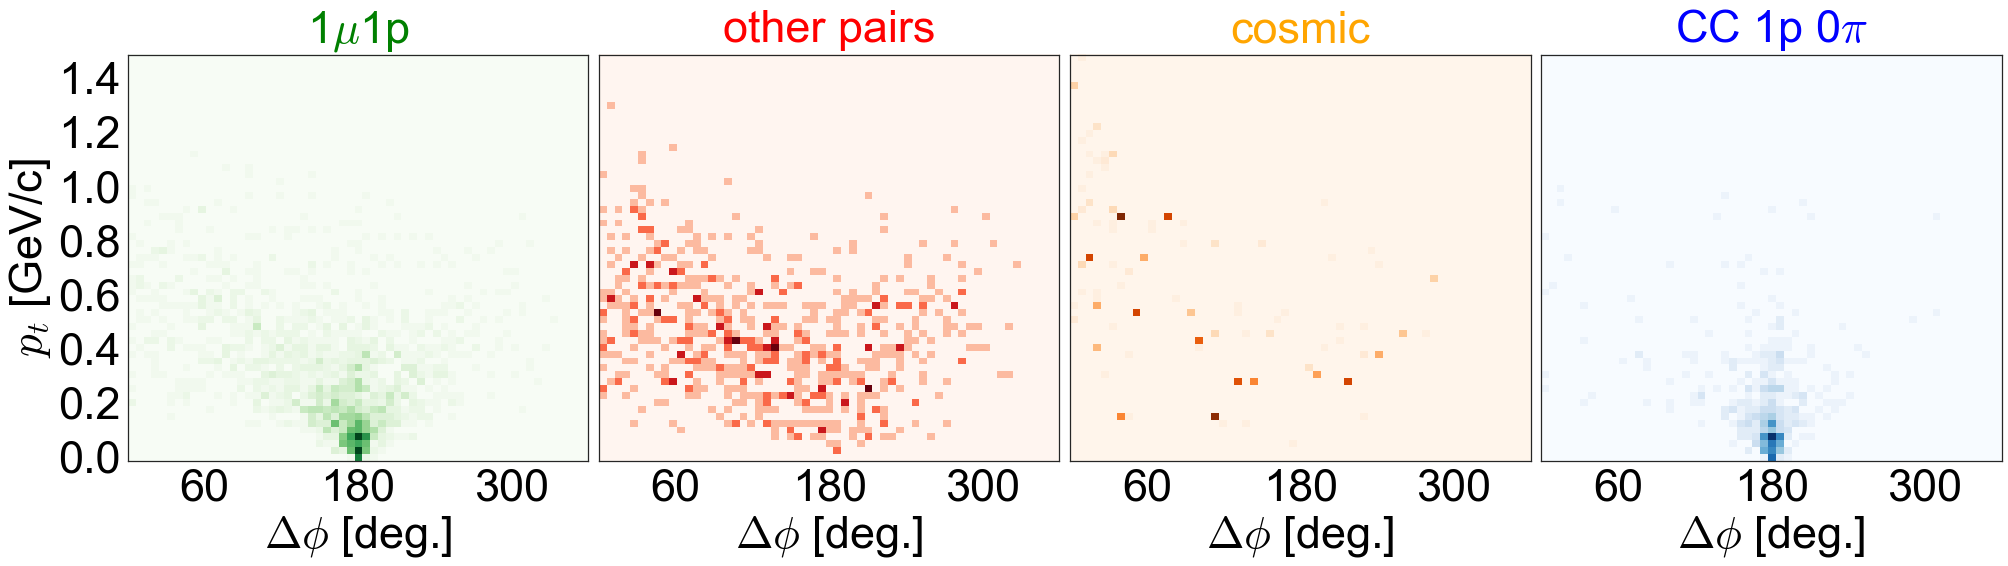

In [403]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,60))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt.pdf')


fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types[1:],labels[1:],cmaps[1:],colors[1:])):
    sample = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt_after_cut_4.pdf')

### \theta_pq

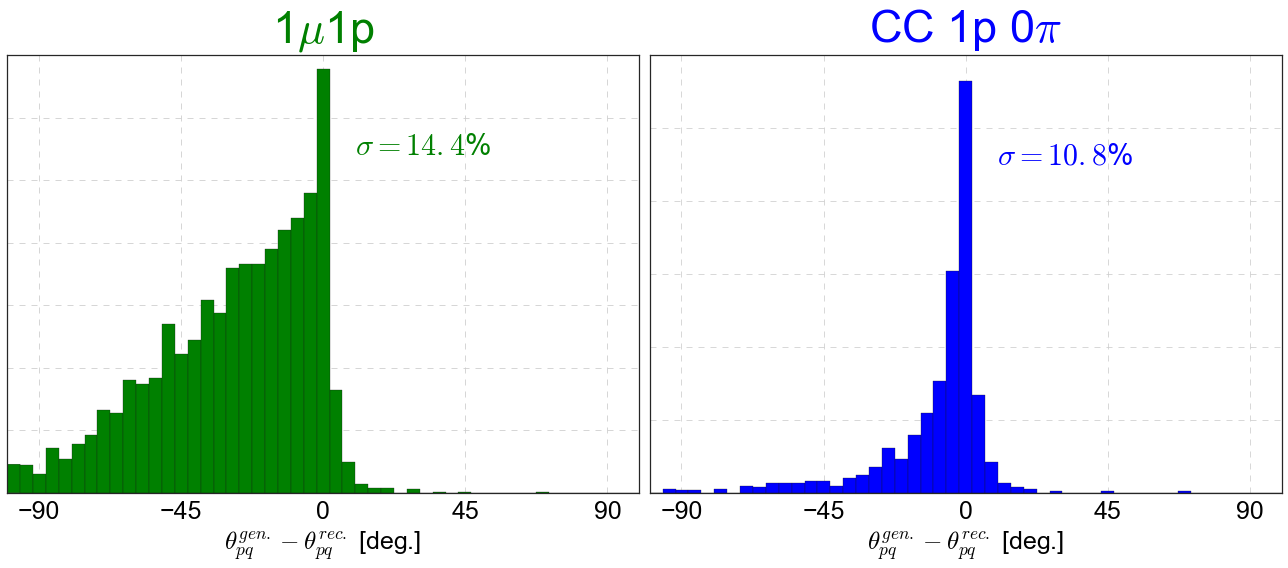

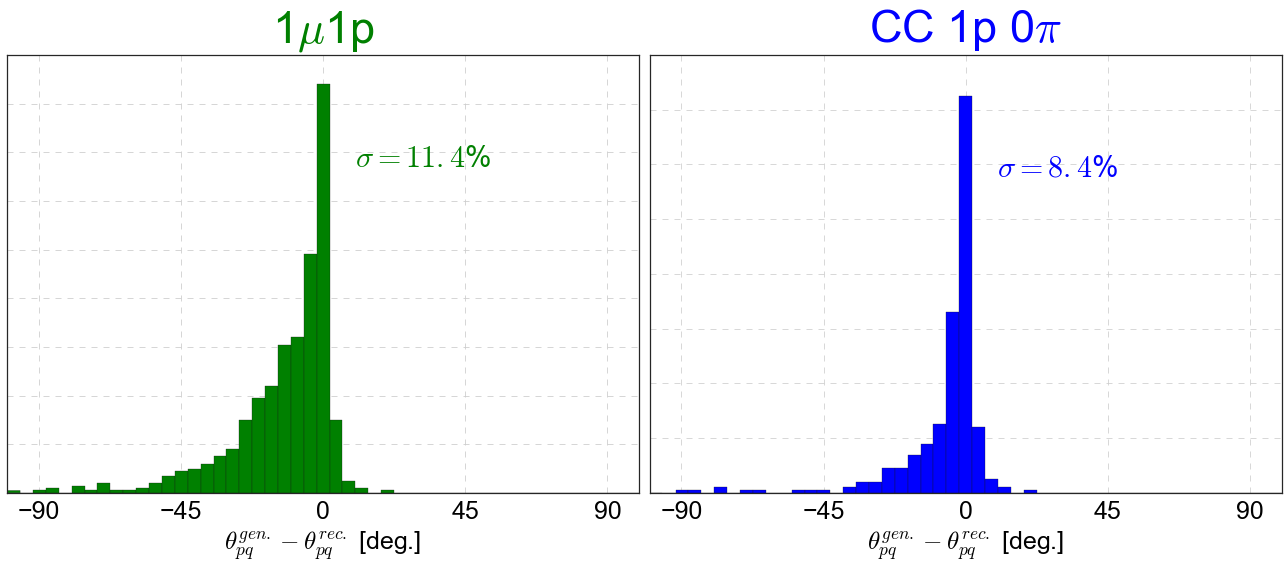

In [405]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_CC1p_theta_pq_fromE'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_CC1p_theta_pq_fromE'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco_after_cut_4.pdf')

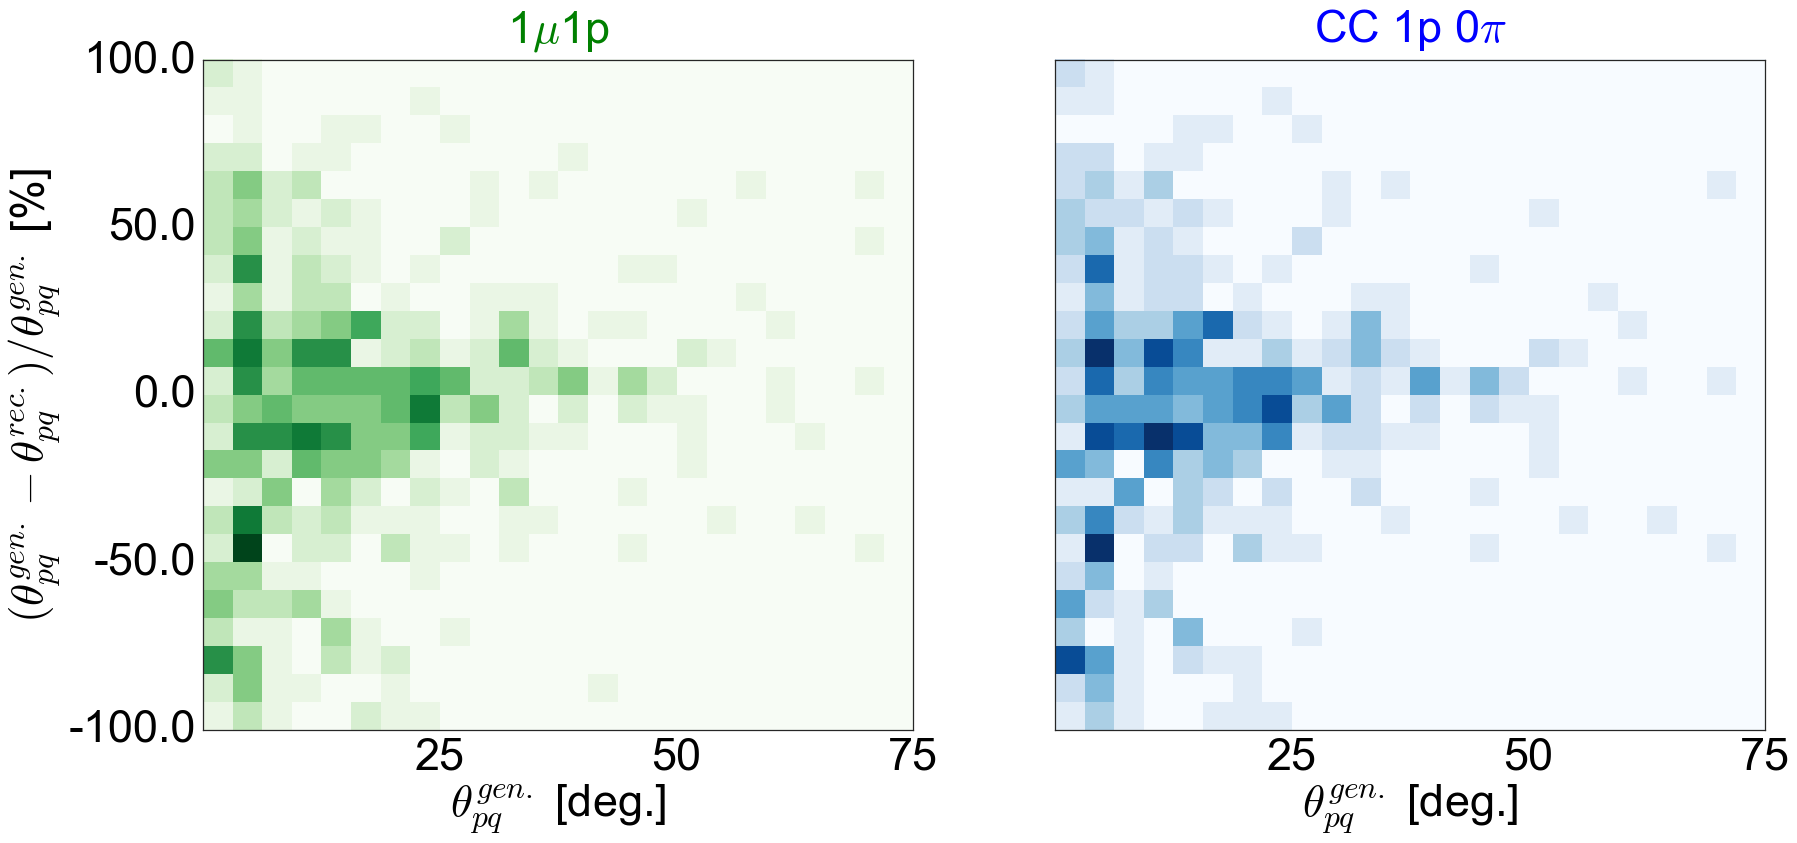

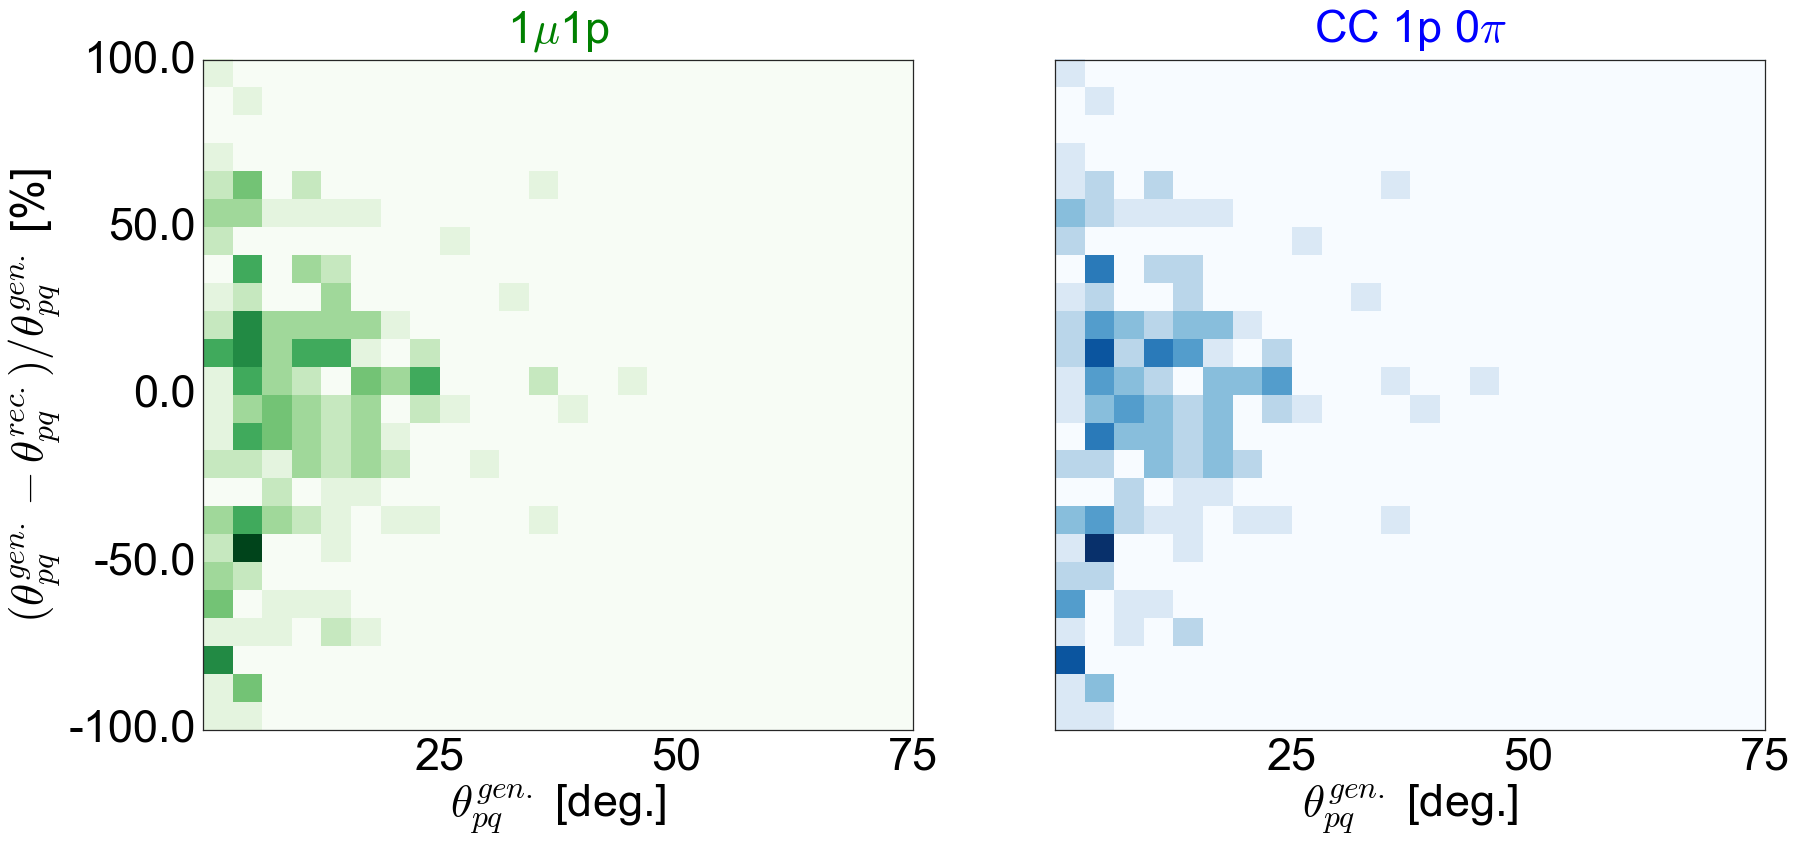

In [408]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,75,25),np.linspace(-100,100,25))
    
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'theta_pq_reconstruction.pdf')

fig = plt.figure(figsize=(28,12))
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction_after_cut_4.pdf')

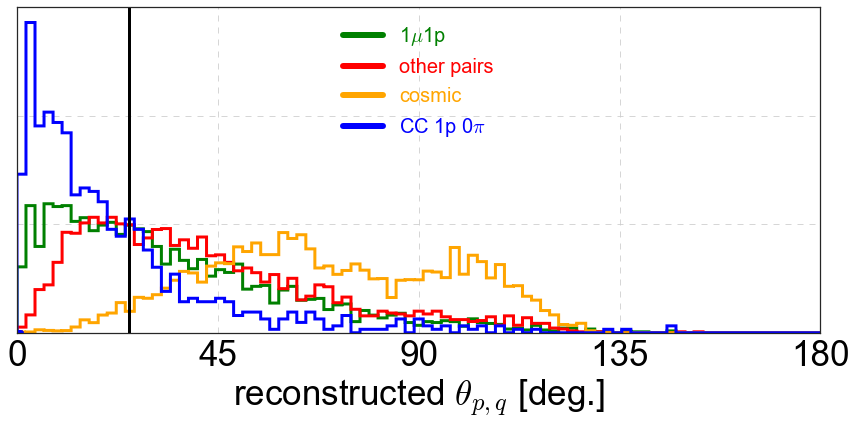

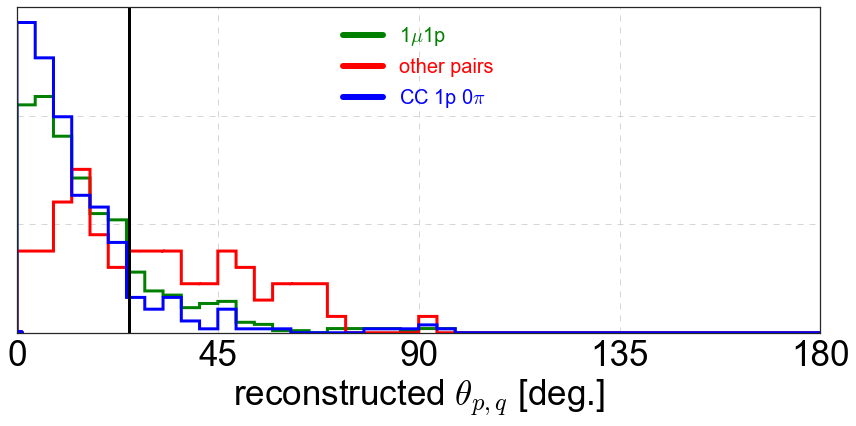

In [427]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='$|\Delta \phi - \pi|<\pi/6$',var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,45)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq_after_cut_4.pdf')

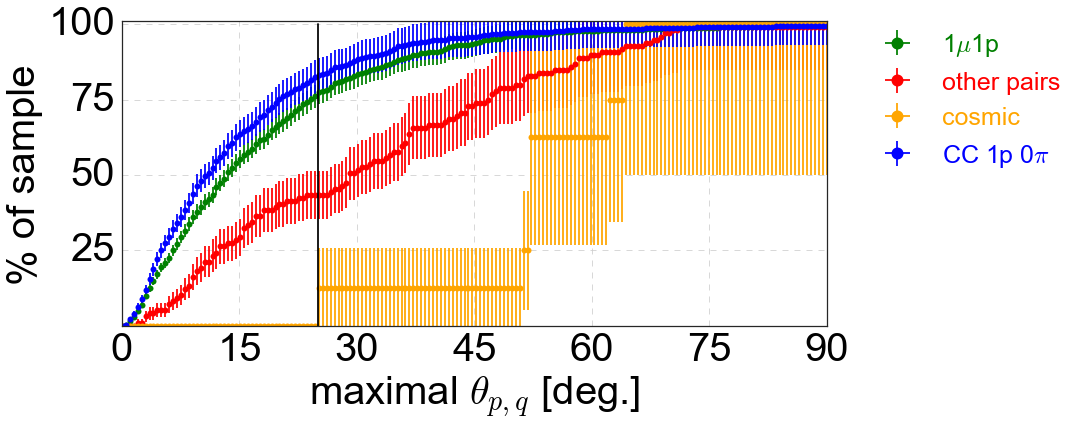

In [49]:
ax,leg=plot_cut_samples(reduced_cut_name='$|\Delta \phi - \pi|<\pi/6$',do_add_legend=True,legend_fontsize=25                    
                 ,cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6));
ax.plot([25,25],[0,100],'-',color='black')
plt.savefig(figures_path+'theta_pq_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### p_t

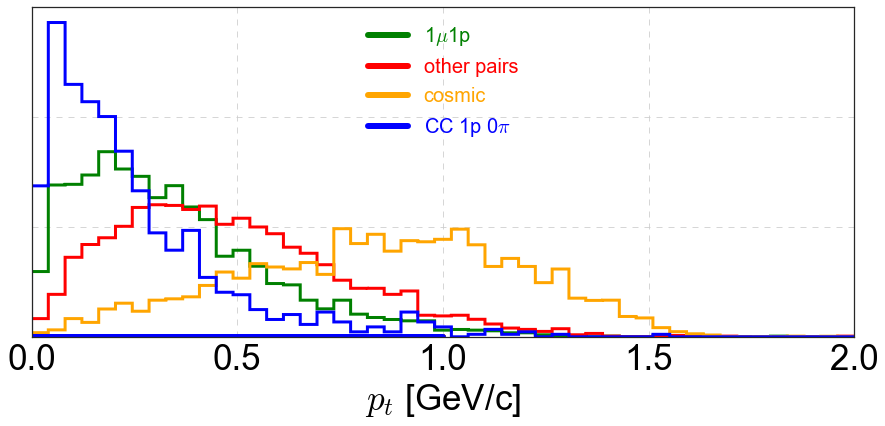

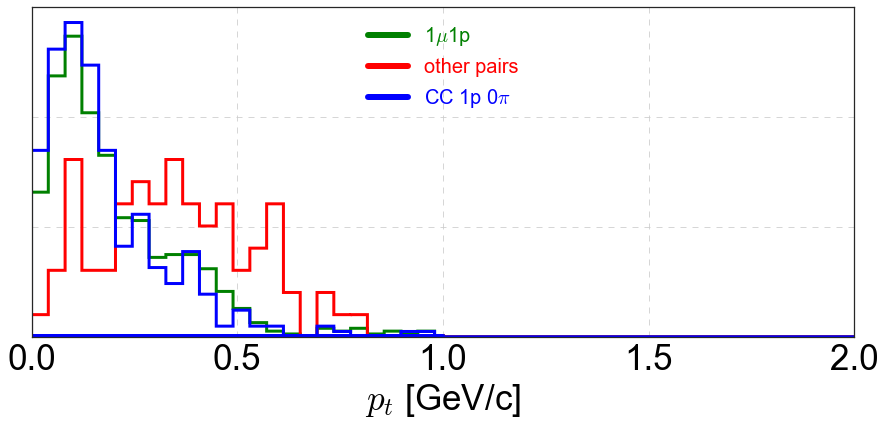

In [432]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_CC1p_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='$|\Delta \phi - \pi|<\pi/6$',var='reco_CC1p_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'Pt_after_cut_4.pdf')

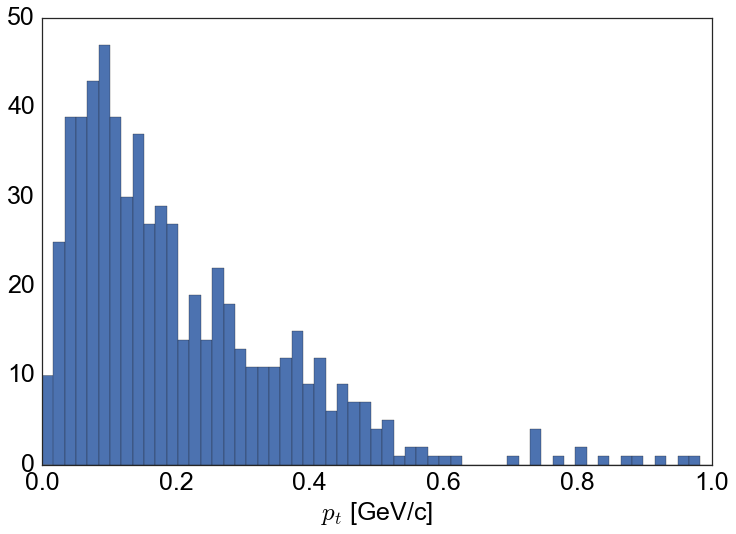

In [433]:
fig,ax=plt.subplots(figsize=(12,8))
ax.hist(reduced_samples['$|\Delta \phi - \pi|<\pi/6$']['1mu-1p']['reco_CC1p_Pt'],bins=np.linspace(0,1.,60));
set_axes(ax,'$p_t$ [GeV/c]')

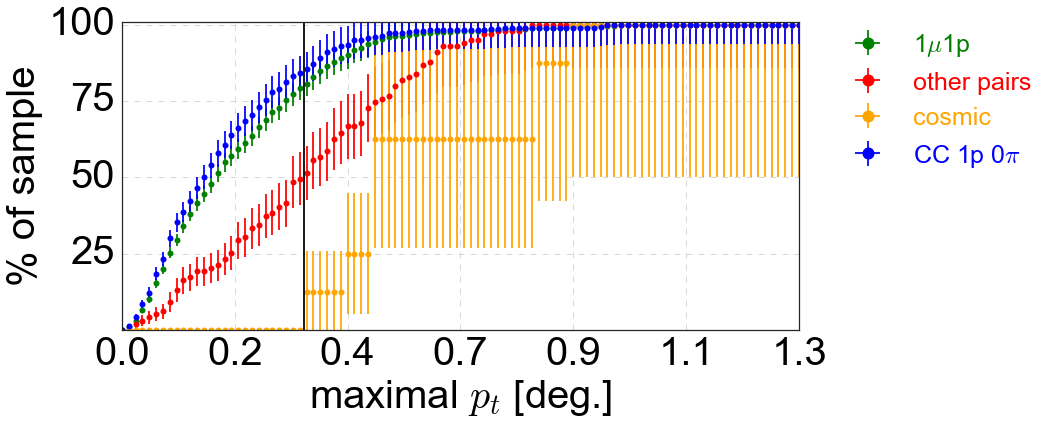

In [50]:
ax,leg=plot_cut_samples(reduced_cut_name='$|\Delta \phi - \pi|<\pi/6$',do_add_legend=True,legend_fontsize=25                 
                     ,cut_var ='reco_CC1p_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1.3 , Nbins=100,fontsize=40,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

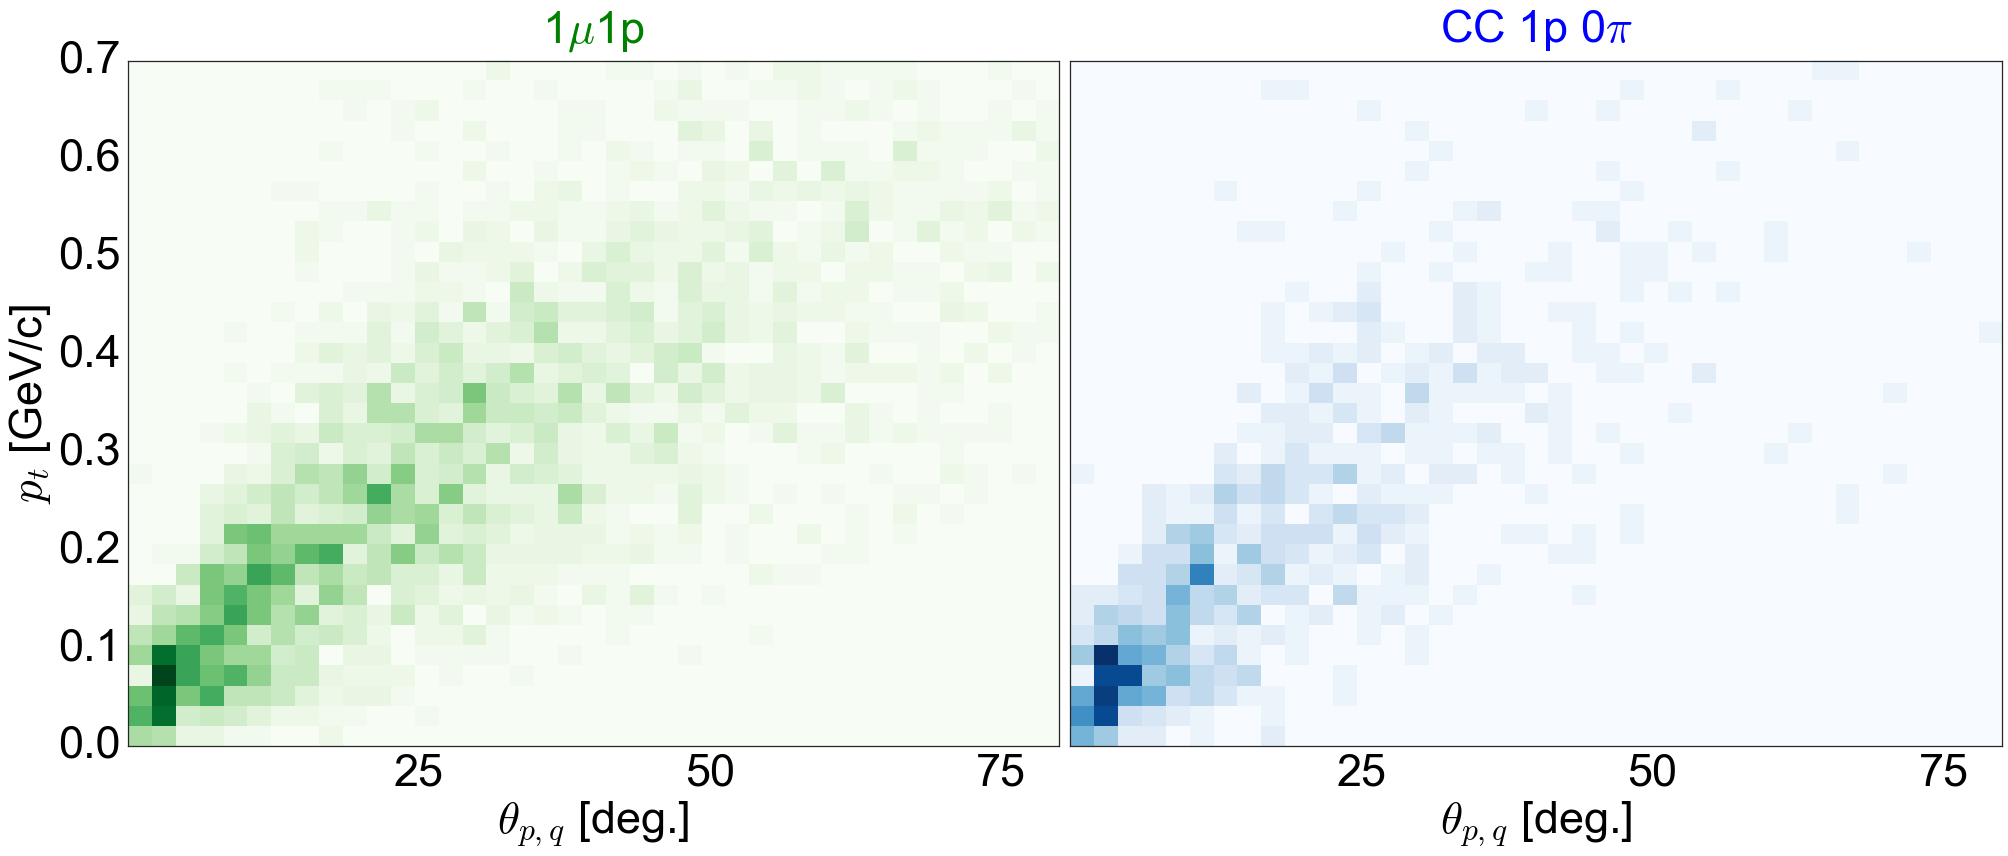

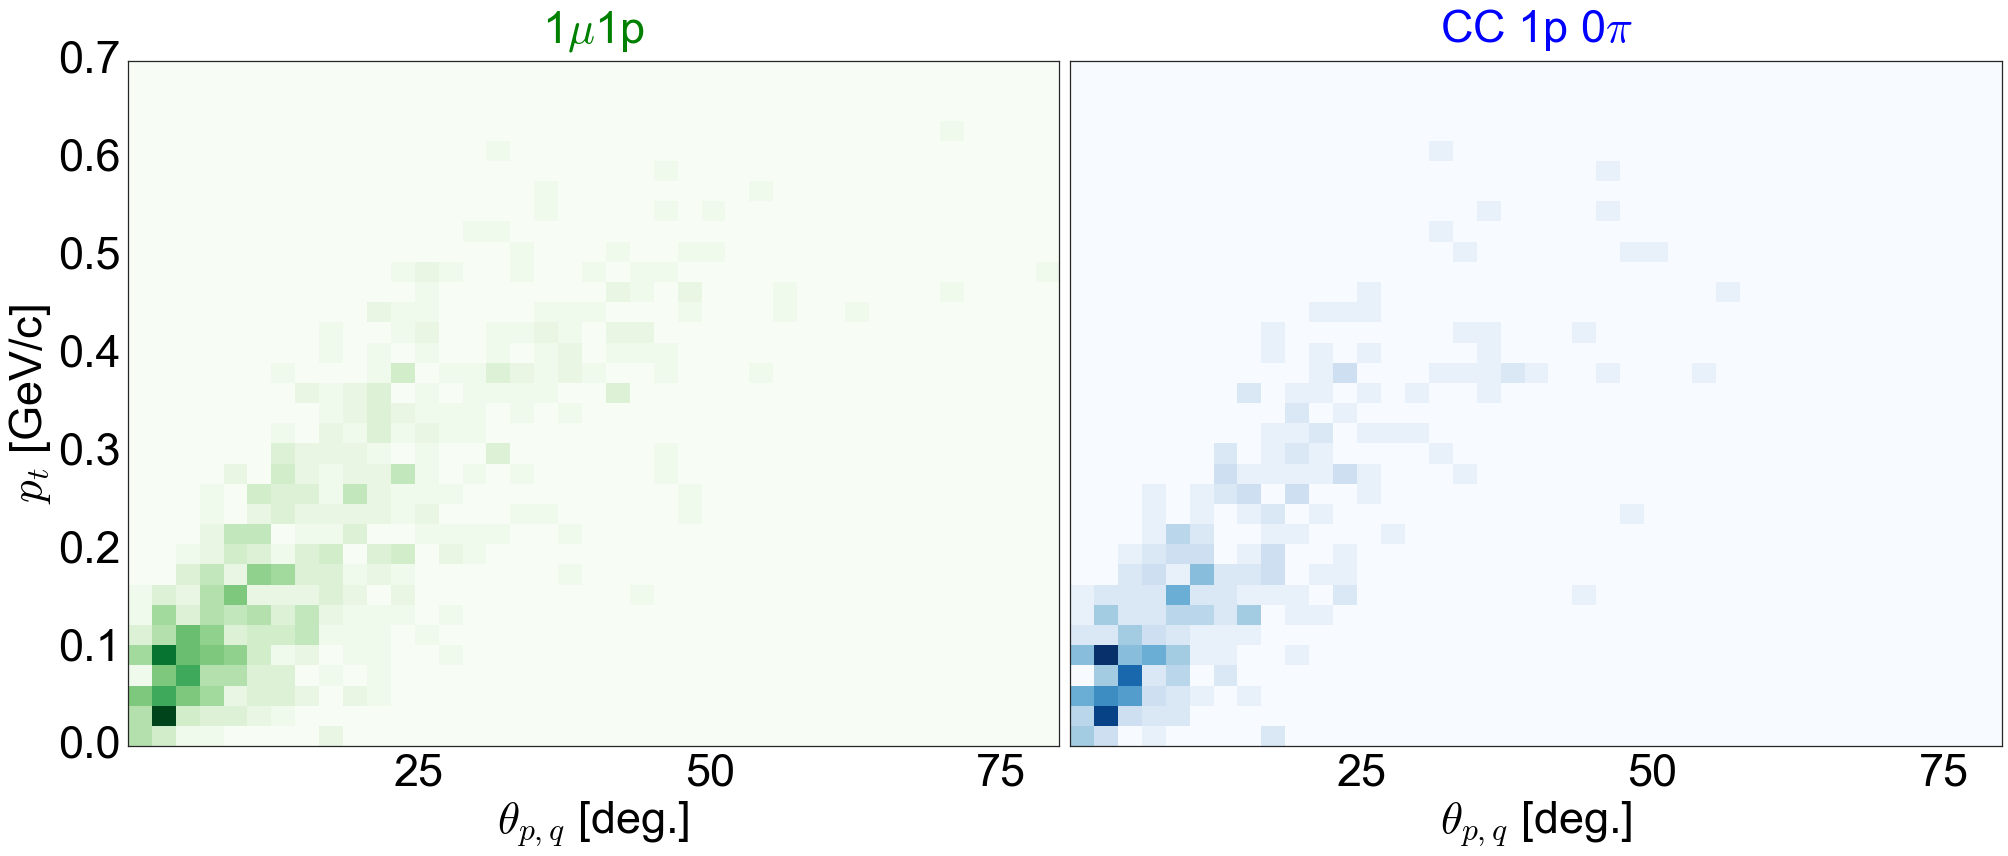

In [437]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt.pdf')


fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([1,4]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_samples['$|\Delta \phi - \pi|<\pi/6$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt_after_cut_5.pdf')